### 1. Importing all the libraries required for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Uploading the dataset

In [2]:
df=pd.read_csv("crop_production.csv")
df

index LOCATION  INDICATOR  SUBJECT   MEASURE FREQUENCY  TIME  \
0          0      AUS  CROPYIELD     RICE  TONNE_HA         A  1990   
1          1      AUS  CROPYIELD     RICE  TONNE_HA         A  1991   
2          2      AUS  CROPYIELD     RICE  TONNE_HA         A  1992   
3          3      AUS  CROPYIELD     RICE  TONNE_HA         A  1993   
4          4      AUS  CROPYIELD     RICE  TONNE_HA         A  1994   
...      ...      ...        ...      ...       ...       ...   ...   
20561  20561     OECD  CROPYIELD  SOYBEAN   THND_HA         A  2021   
20562  20562     OECD  CROPYIELD  SOYBEAN   THND_HA         A  2022   
20563  20563     OECD  CROPYIELD  SOYBEAN   THND_HA         A  2023   
20564  20564     OECD  CROPYIELD  SOYBEAN   THND_HA         A  2024   
20565  20565     OECD  CROPYIELD  SOYBEAN   THND_HA         A  2025   

              Value  Flag Codes  
0          8.314607         NaN  
1          8.394737         NaN  
2          8.094340         NaN  
3          8.336000         NaN  
4          8.537815         NaN  
...             ...         ...  
20561  37010.208830         NaN  
20562  37069.214850         NaN  
20563  37143.459750         NaN  
20564  37013.651900         NaN  
20565  37041.401580         NaN  

[20566 rows x 9 columns]

### 3. Checking for null and duplicate values

In [3]:
df.isna().sum()

index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20561    False
20562    False
20563    False
20564    False
20565    False
Length: 20566, dtype: bool

### 4. Getting the basic info and statistical data

In [5]:
df.describe(include='all')

index LOCATION  INDICATOR SUBJECT     MEASURE FREQUENCY  \
count   20566.000000    20566      20566   20566       20566     20566   
unique           NaN       48          1       4           3         1   
top              NaN      NZL  CROPYIELD   MAIZE  THND_TONNE         A   
freq             NaN      449      20566    5151        6877     20566   
mean    10282.500000      NaN        NaN     NaN         NaN       NaN   
std      5937.037154      NaN        NaN     NaN         NaN       NaN   
min         0.000000      NaN        NaN     NaN         NaN       NaN   
25%      5141.250000      NaN        NaN     NaN         NaN       NaN   
50%     10282.500000      NaN        NaN     NaN         NaN       NaN   
75%     15423.750000      NaN        NaN     NaN         NaN       NaN   
max     20565.000000      NaN        NaN     NaN         NaN       NaN   

                TIME         Value  Flag Codes  
count   20566.000000  2.056600e+04         0.0  
unique           NaN           NaN         NaN  
top              NaN           NaN         NaN  
freq             NaN           NaN         NaN  
mean     2007.591170  1.249281e+04         NaN  
std        10.369489  5.960529e+04         NaN  
min      1970.000000  0.000000e+00         NaN  
25%      1999.000000  1.961877e+00         NaN  
50%      2008.000000  2.560970e+01         NaN  
75%      2017.000000  1.563000e+03         NaN  
max      2025.000000  1.146044e+06         NaN


**We can see that INDICATOR, FREQUENCY and Flag Codes contain no relevant info (always same value or only NaN)**

In [6]:
# remove columns w/o relevant info
df.drop(['INDICATOR','FREQUENCY','Flag Codes'], axis=1, inplace=True)

In [7]:
df.head(10)

index LOCATION SUBJECT   MEASURE  TIME     Value
0      0      AUS    RICE  TONNE_HA  1990  8.314607
1      1      AUS    RICE  TONNE_HA  1991  8.394737
2      2      AUS    RICE  TONNE_HA  1992  8.094340
3      3      AUS    RICE  TONNE_HA  1993  8.336000
4      4      AUS    RICE  TONNE_HA  1994  8.537815
5      5      AUS    RICE  TONNE_HA  1995  7.051095
6      6      AUS    RICE  TONNE_HA  1996  8.256579
7      7      AUS    RICE  TONNE_HA  1997  9.006803
8      8      AUS    RICE  TONNE_HA  1998  9.202703
9      9      AUS    RICE  TONNE_HA  1999  8.274809

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566 entries, 0 to 20565
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     20566 non-null  int64  
 1   LOCATION  20566 non-null  object 
 2   SUBJECT   20566 non-null  object 
 3   MEASURE   20566 non-null  object 
 4   TIME      20566 non-null  int64  
 5   Value     20566 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 964.2+ KB


### 5. Data about features and visualising patterns between different features

In [9]:
# show locations
all_locations = df.LOCATION.value_counts().index.tolist()
print(all_locations)

['NZL', 'AUS', 'THA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'UKR', 'MOZ', 'URY', 'VNM', 'ZMB', 'SSA', 'BRICS', 'NOR', 'CHE', 'ISR', 'CAN', 'NGA', 'MYS', 'BRA', 'JPN', 'KOR', 'MEX', 'TUR', 'USA', 'DZA', 'ARG', 'KAZ', 'BGD', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA', 'IND', 'IDN', 'IRN', 'HTI', 'WLD', 'OECD', 'EU28']


In [10]:
# show subjects
all_subjects = df.SUBJECT.value_counts().index.tolist()
print(all_subjects)

['MAIZE', 'RICE', 'WHEAT', 'SOYBEAN']


In [11]:
# show measures
all_measures = df.MEASURE.value_counts().index.tolist()
print(all_measures)

['THND_TONNE', 'THND_HA', 'TONNE_HA']


In [12]:
# measures by subject
pd.crosstab(df.SUBJECT, df.MEASURE)

MEASURE  THND_HA  THND_TONNE  TONNE_HA
SUBJECT                               
MAIZE       1719        1716      1716
RICE        1718        1715      1715
SOYBEAN     1713        1733      1682
WHEAT       1713        1713      1713

C:\Users\Abhinandan Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value', ylabel='TIME'>

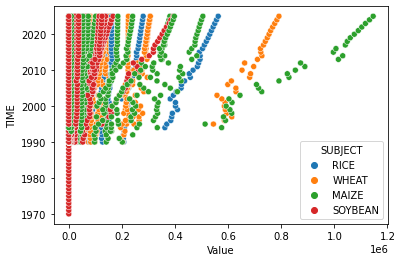

In [13]:
#scatterplot
sns.scatterplot(df['Value'],df['TIME'],hue=df['SUBJECT'])

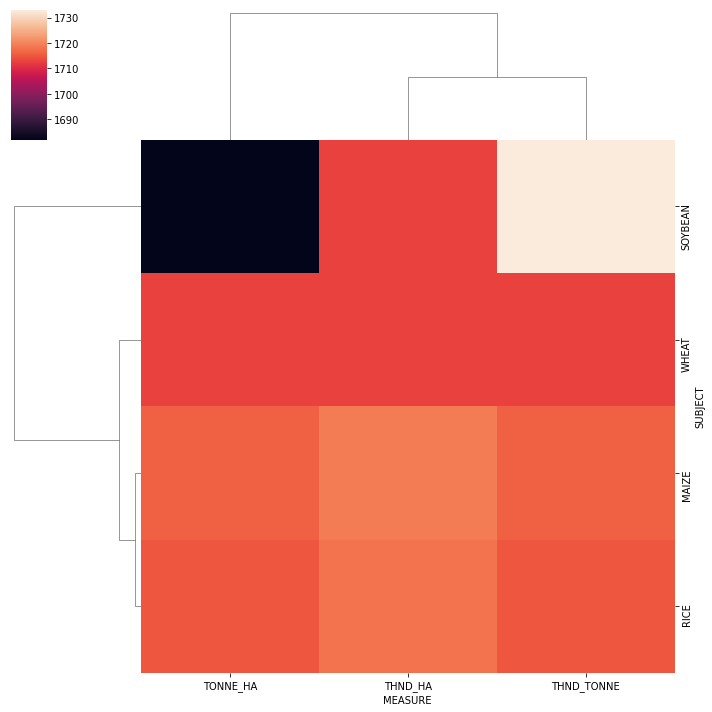

In [14]:
#clustermap
sns.clustermap(pd.crosstab(df['SUBJECT'],df['MEASURE']))

<AxesSubplot:title={'center':'Crop measure'}, xlabel='Value', ylabel='SUBJECT'>

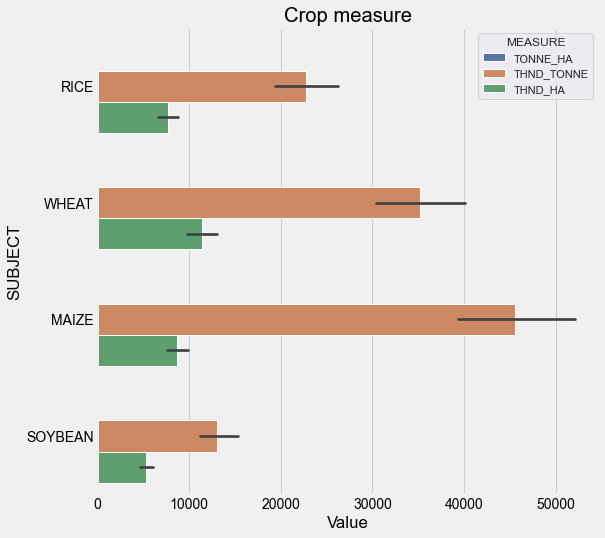

In [15]:
#barplot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Crop measure")
sns.set(font_scale=1)
sns.barplot(data=df, x="Value", y="SUBJECT",hue="MEASURE")

#### Select a specific country / measure

In [16]:
select_location = 'IND'
select_measure = 'THND_TONNE'

In [17]:
df_select = df[(df.LOCATION==select_location) & (df.MEASURE==select_measure)]

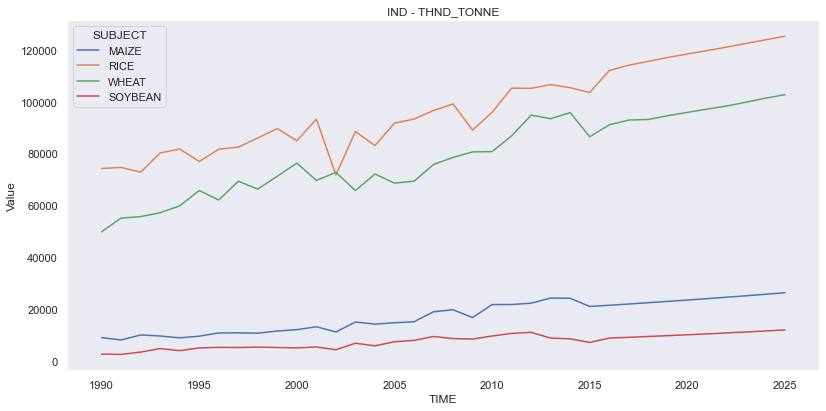

In [18]:
# plot all 4 subjects
plt.figure(figsize=(12,6))
sns.lineplot(data=df_select, x='TIME', y='Value', 
             hue='SUBJECT', hue_order=all_subjects)
plt.title(select_location + ' - '+ select_measure)
plt.grid()
plt.show()

#### Measure = THND_TONNE

In [19]:
select_measure = 'THND_TONNE'

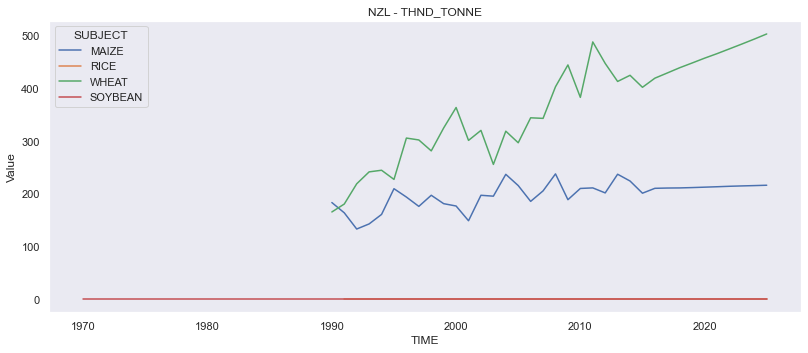

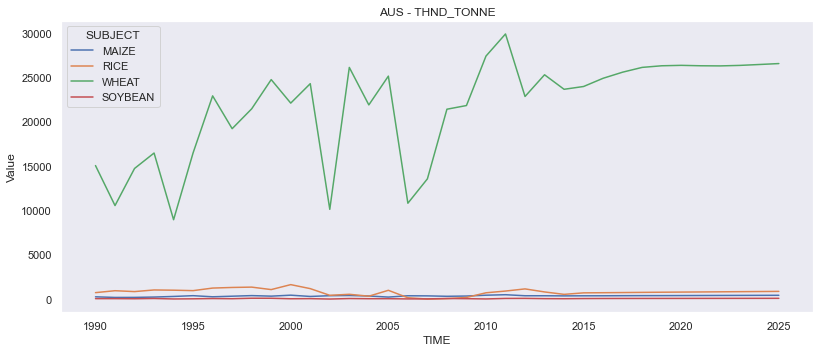

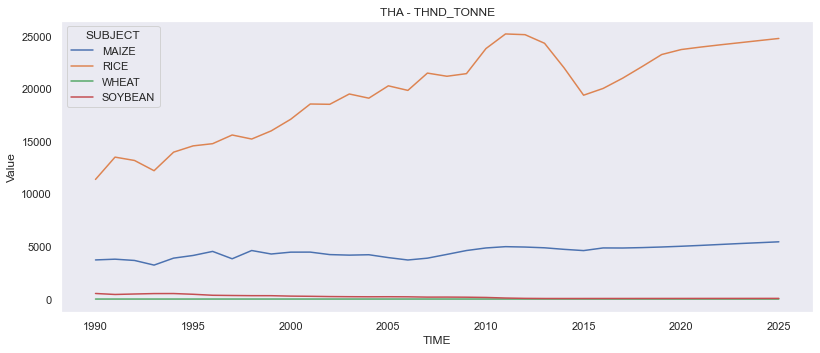

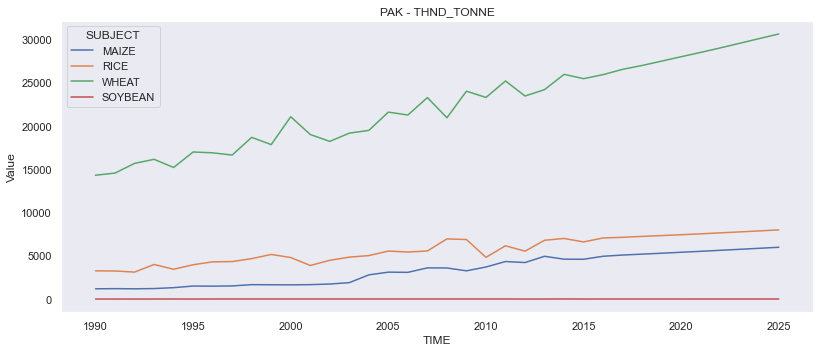

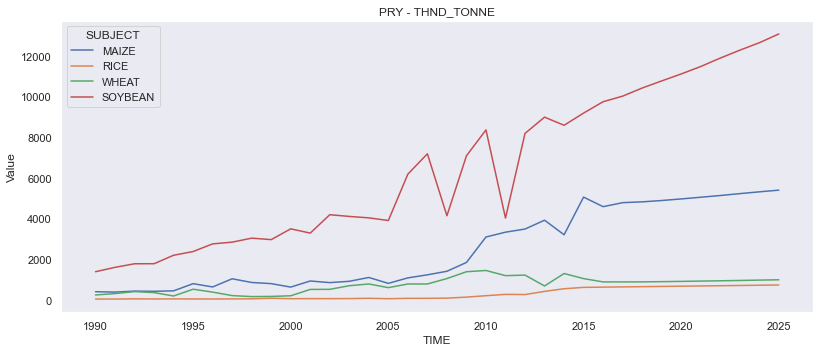

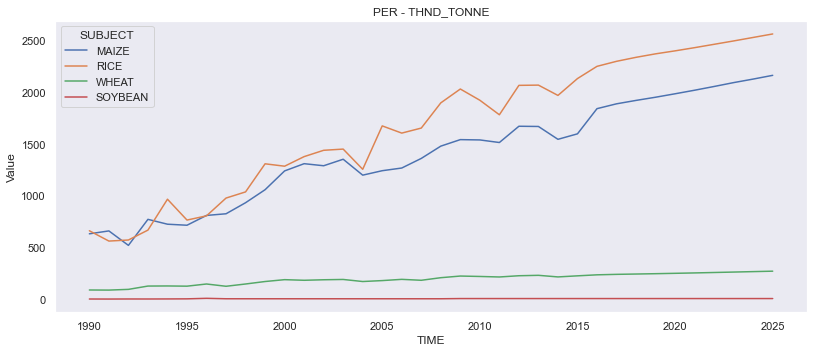

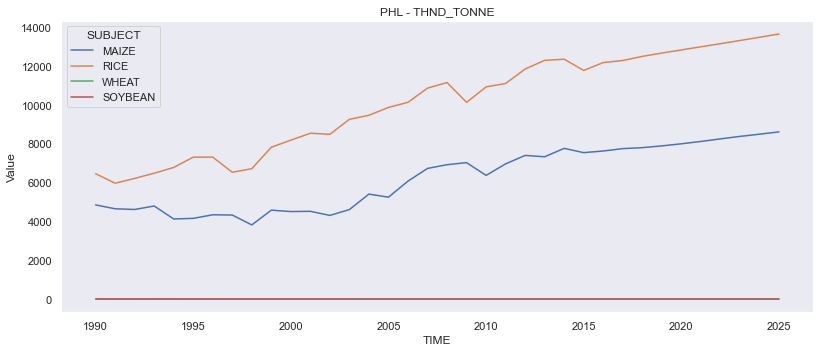

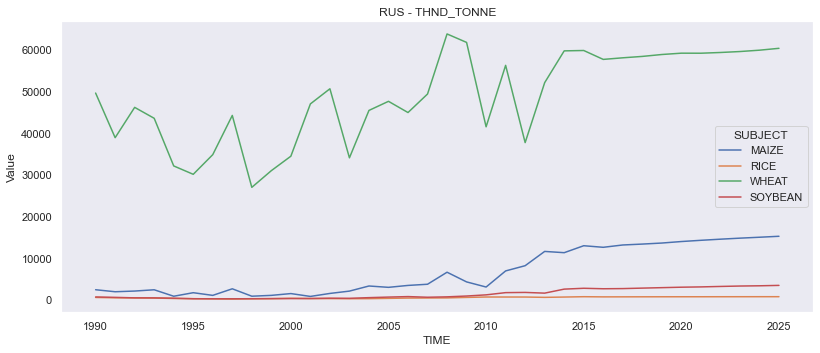

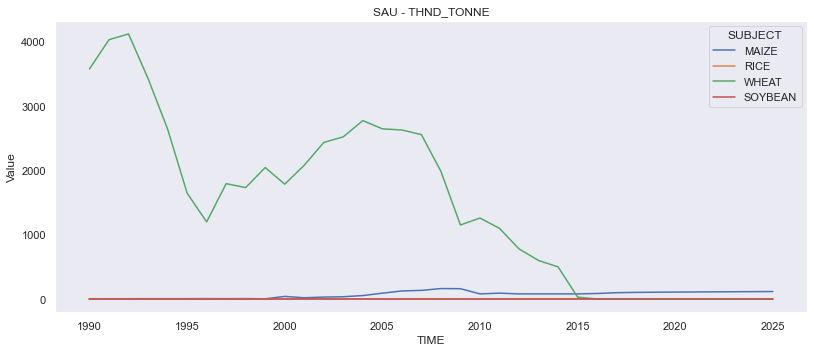

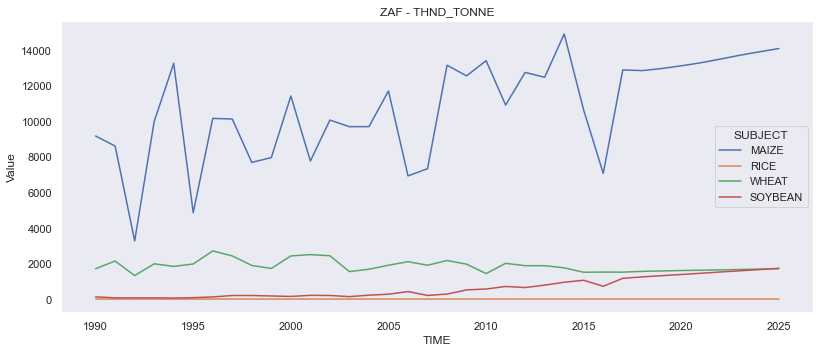

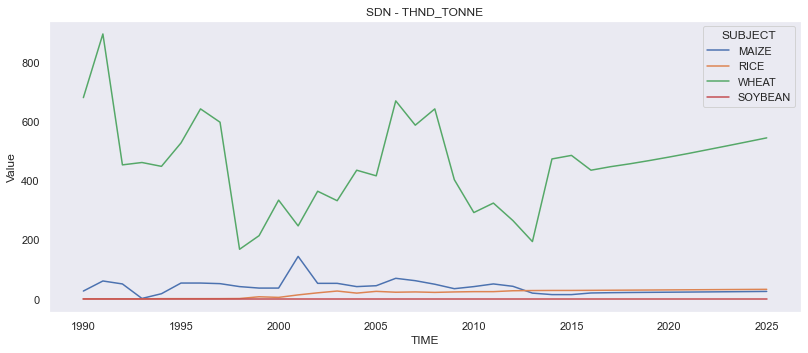

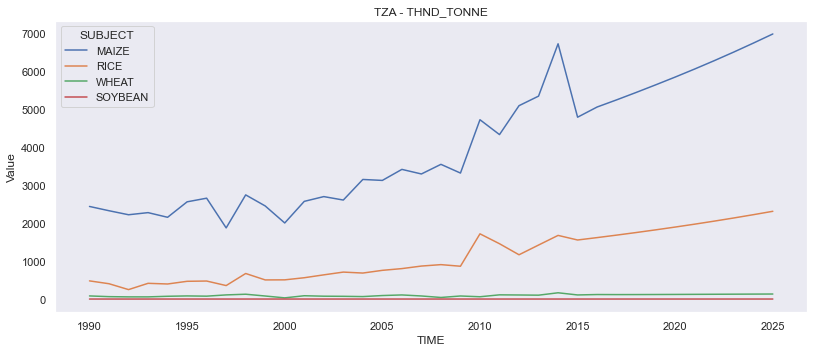

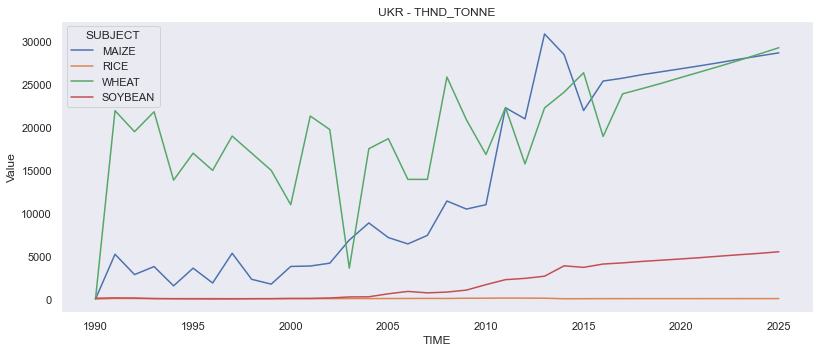

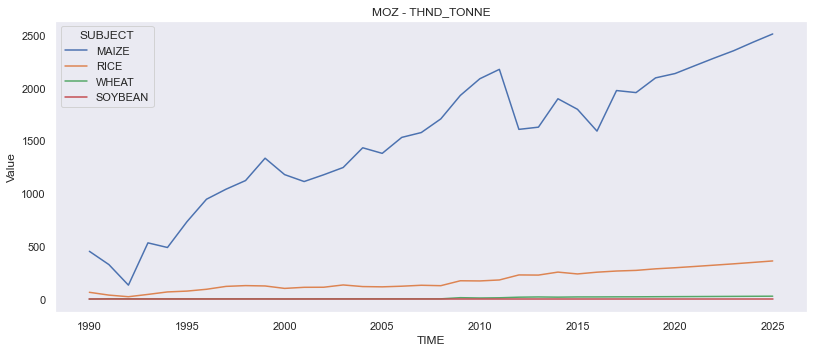

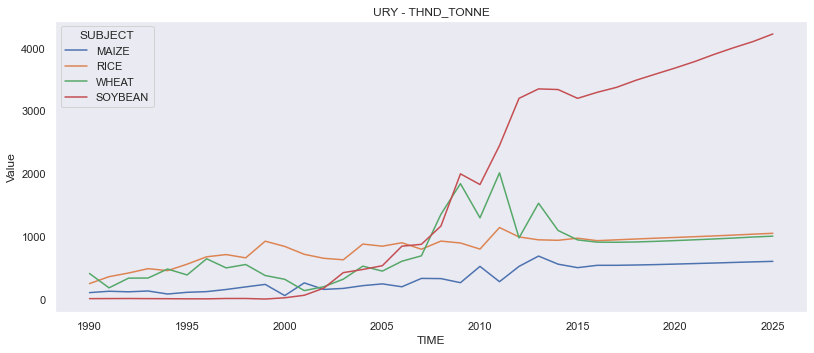

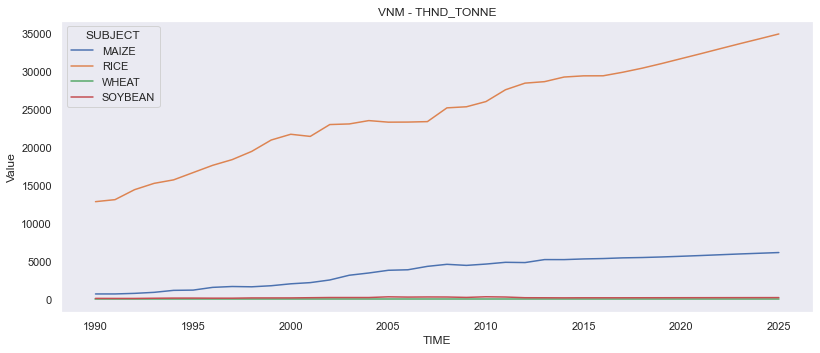

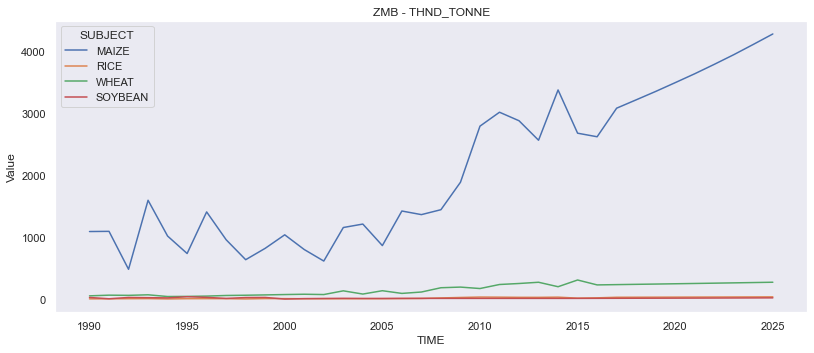

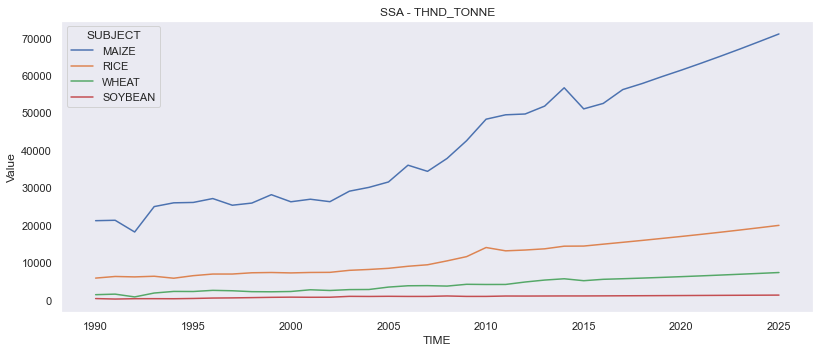

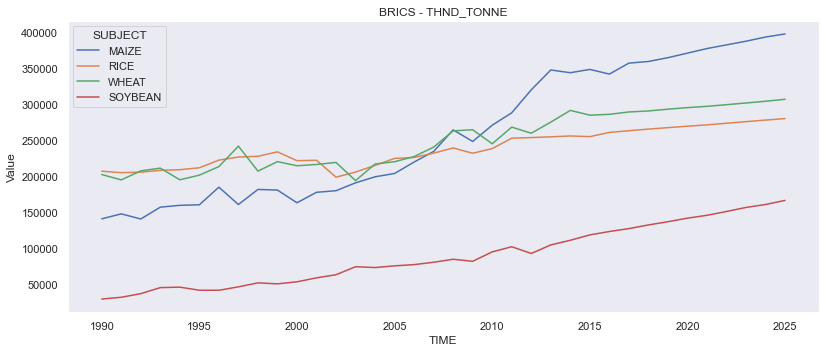

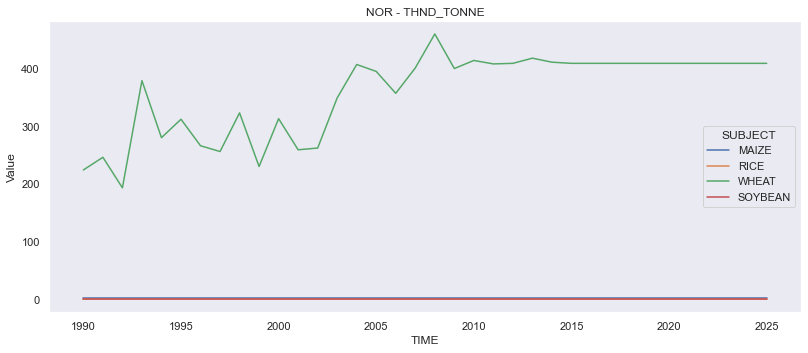

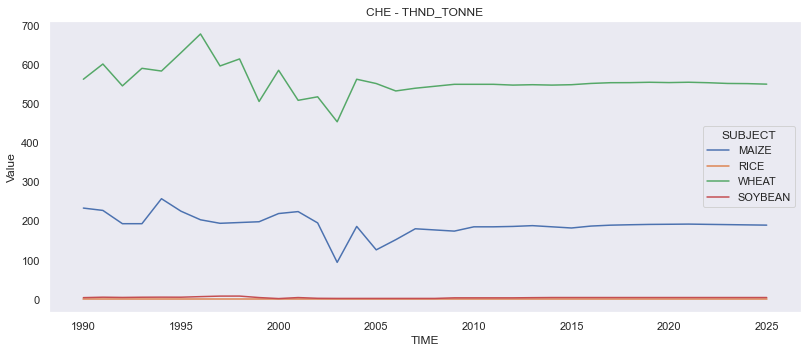

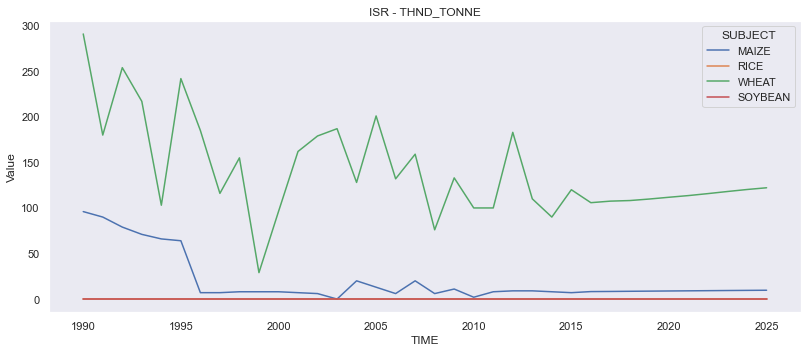

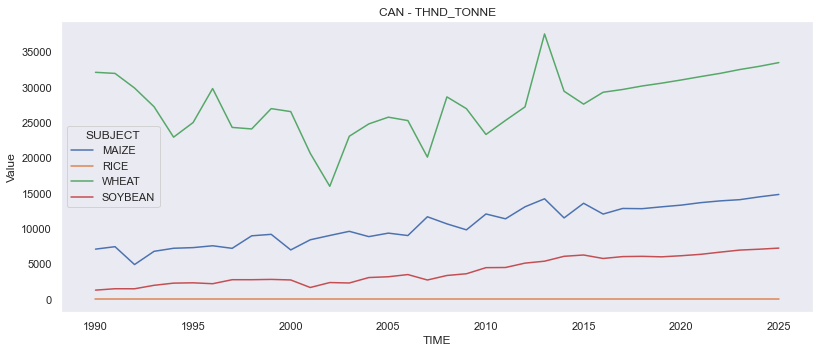

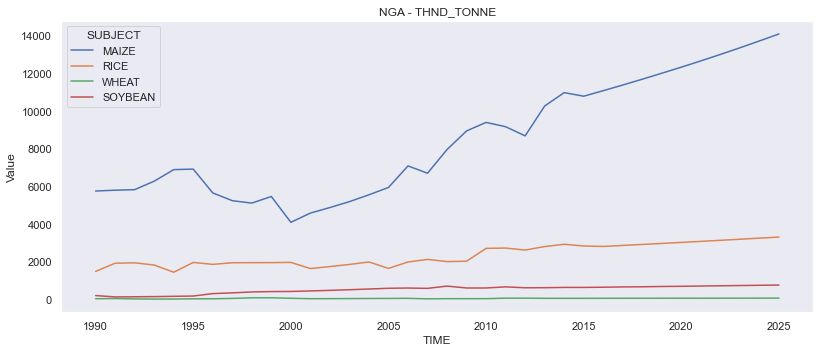

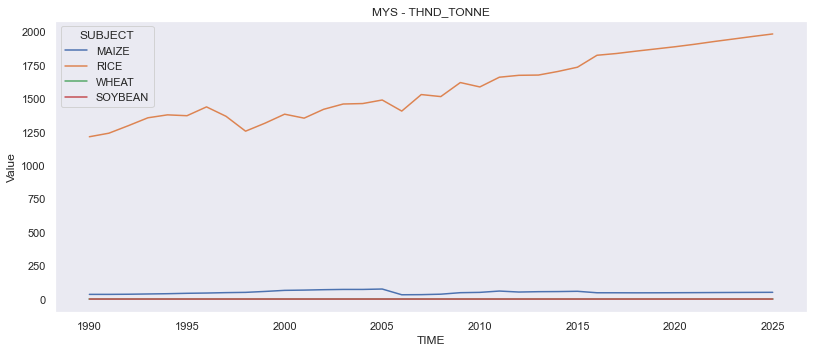

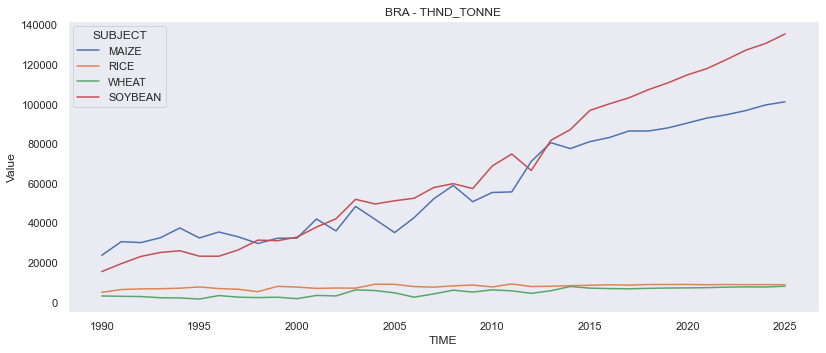

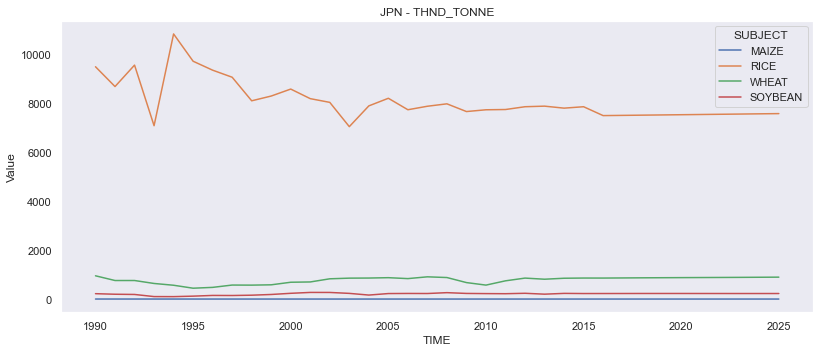

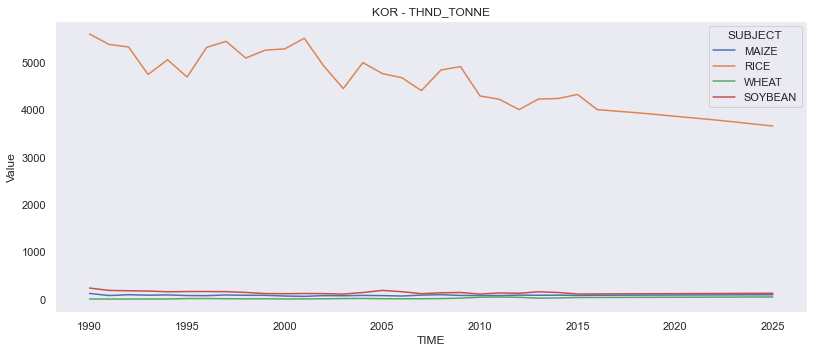

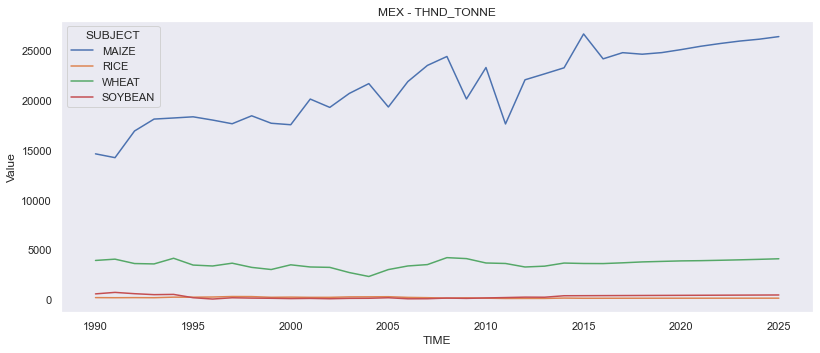

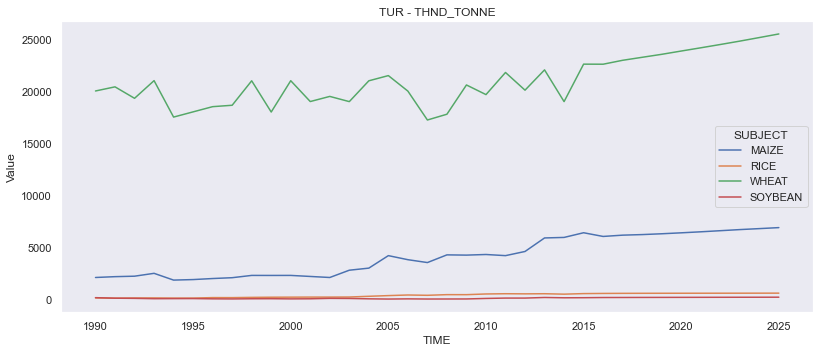

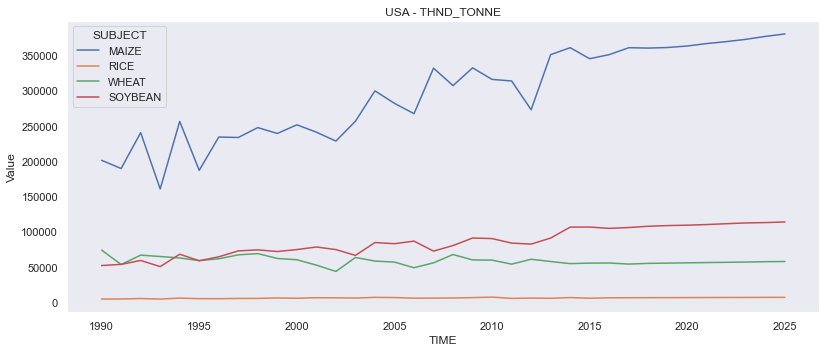

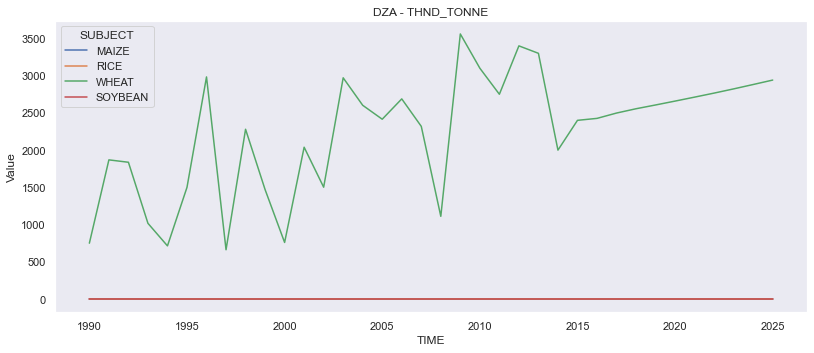

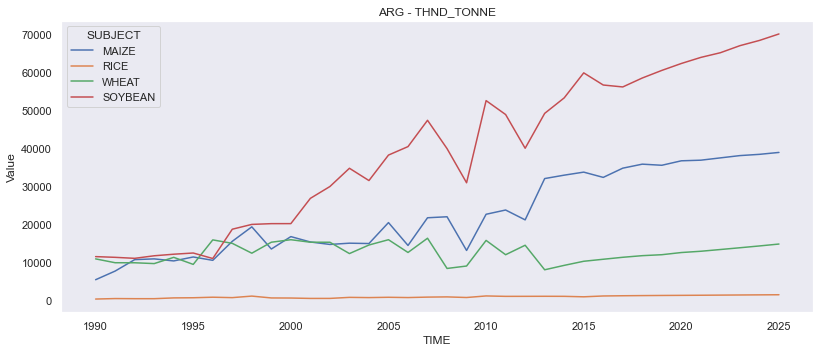

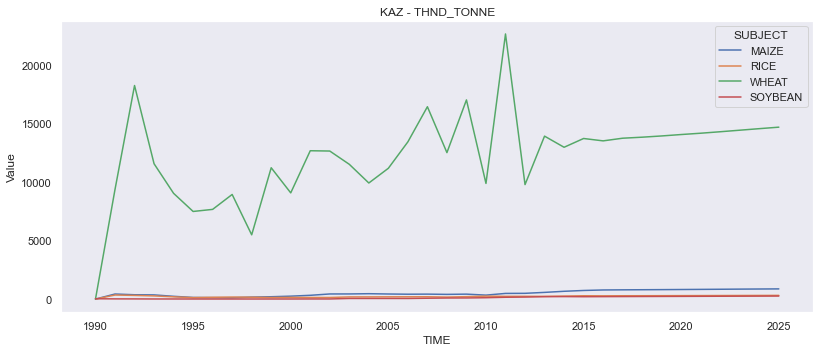

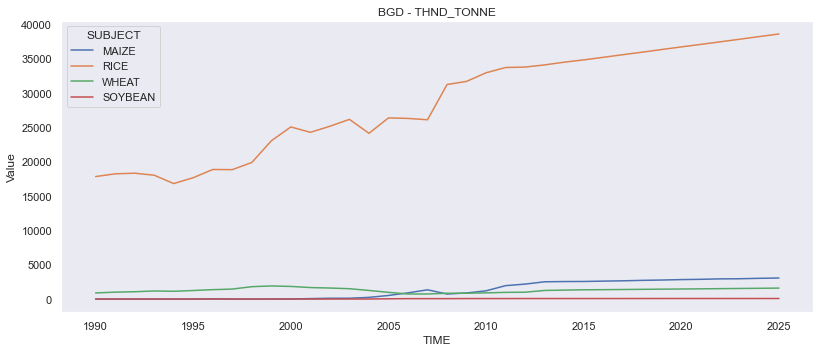

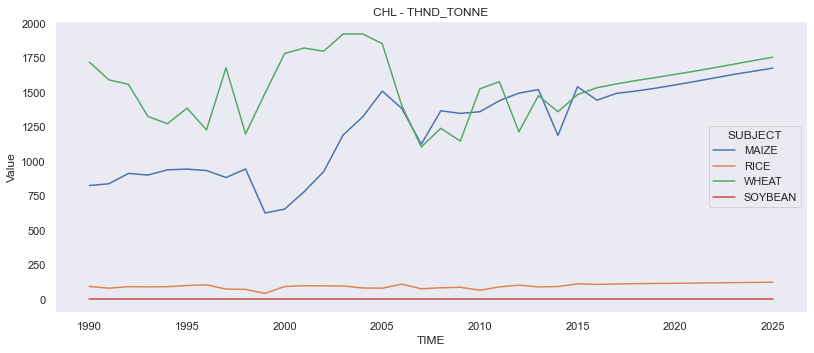

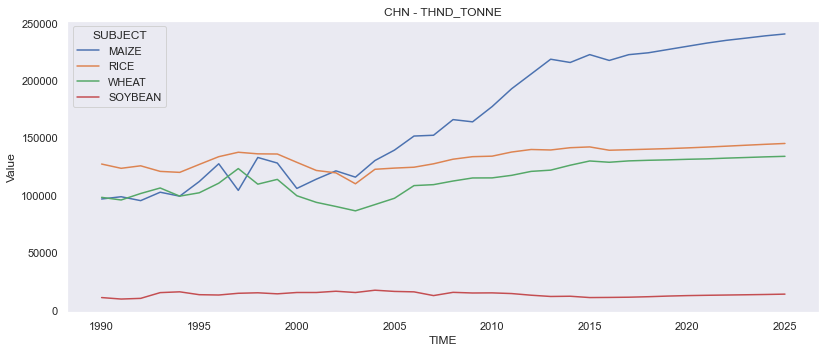

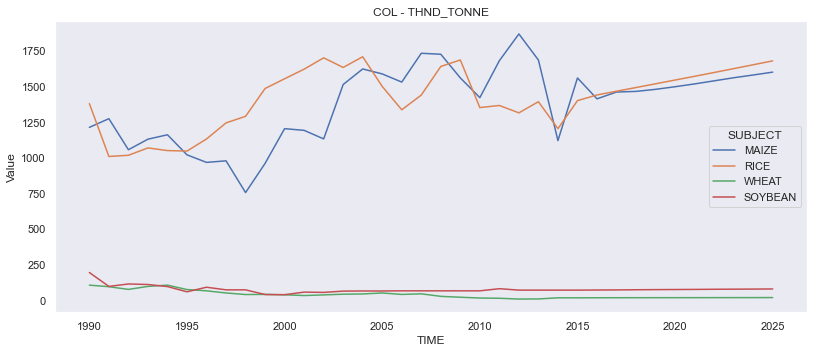

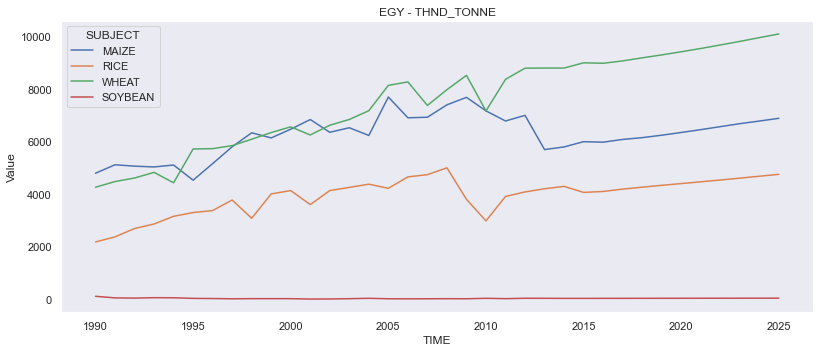

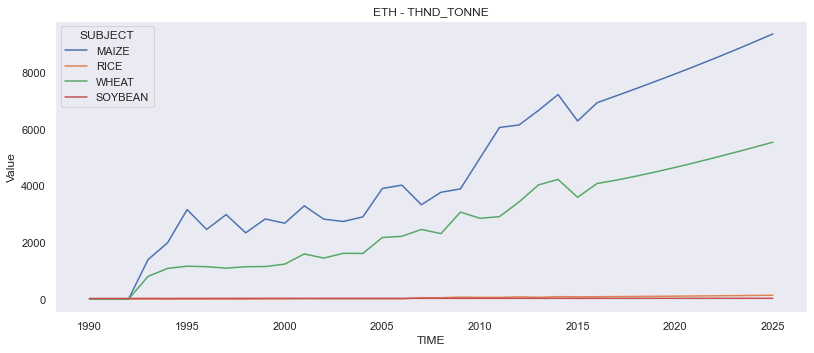

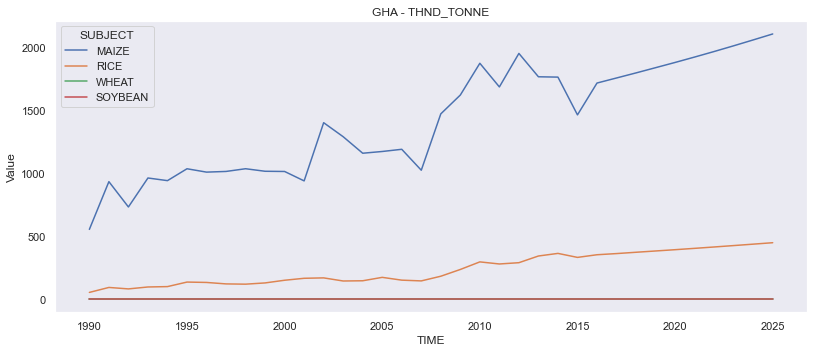

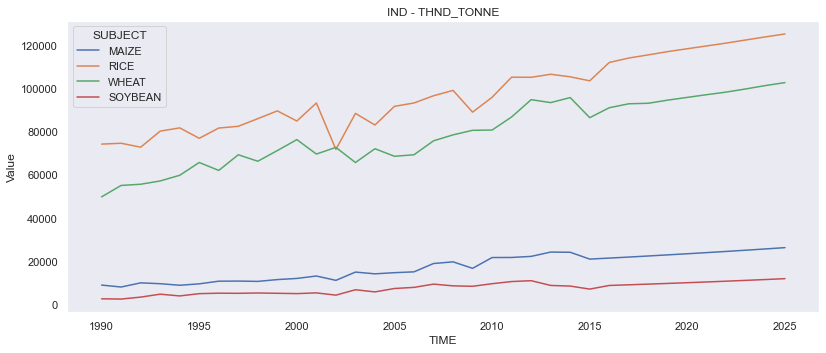

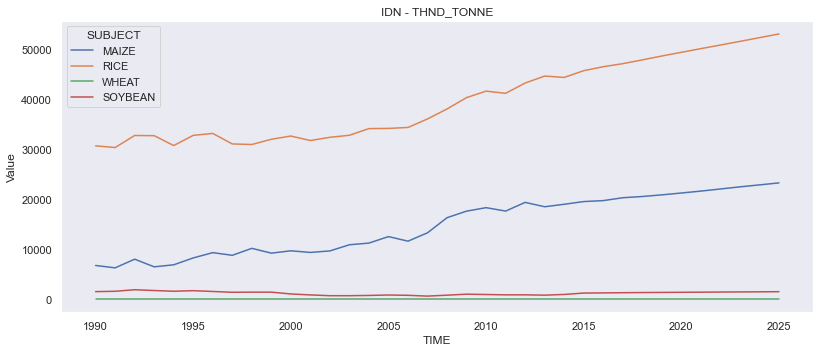

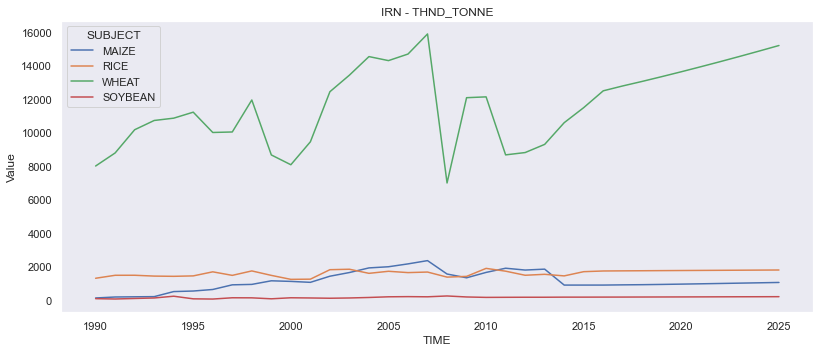

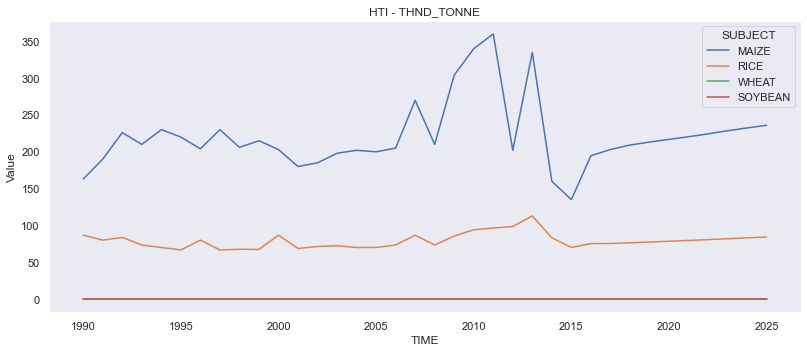

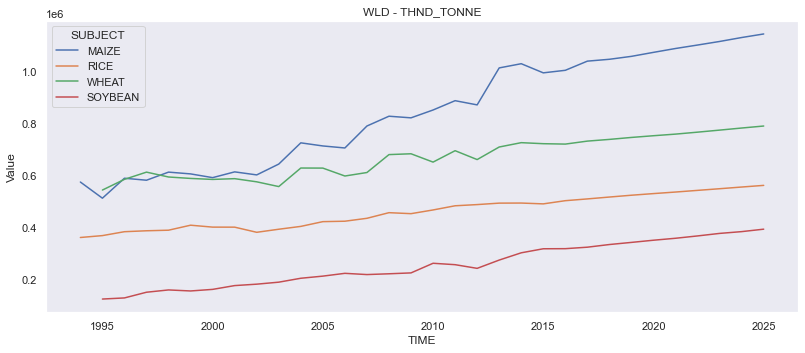

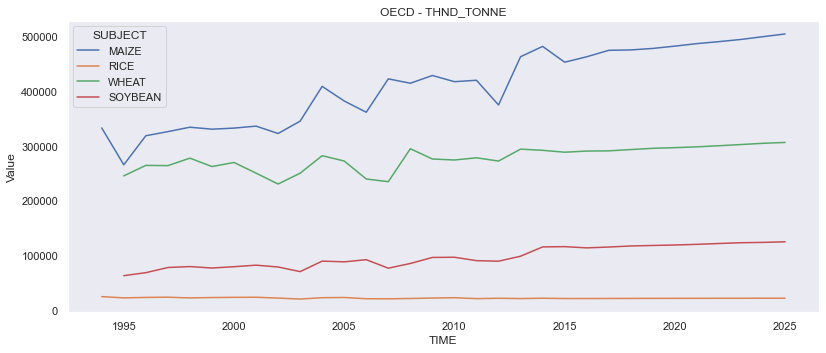

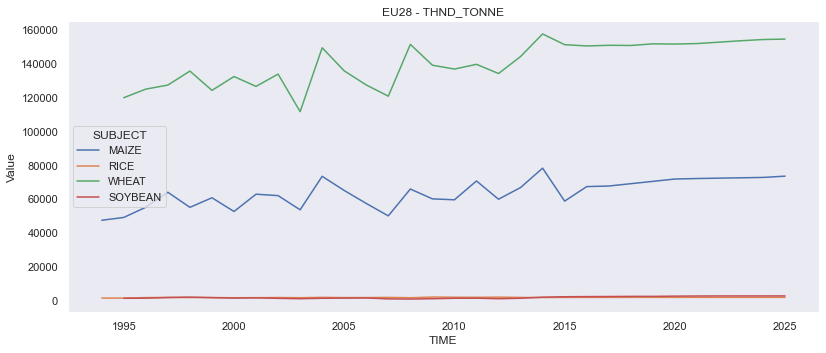

In [20]:
# loop over all locations
for select_location in all_locations:
    df_select = df[(df.LOCATION==select_location) & (df.MEASURE==select_measure)]
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df_select, x='TIME', y='Value', 
                 hue='SUBJECT', hue_order=all_subjects)
    plt.title(select_location + ' - '+ select_measure)
    plt.grid()
    plt.show()

#### Measure = THND_HA

In [21]:
select_measure = 'THND_HA'

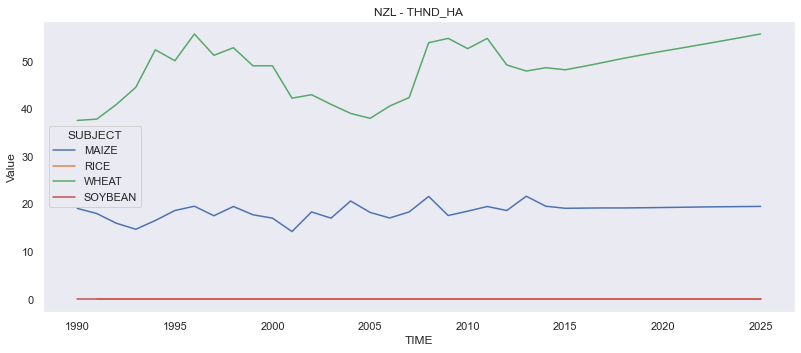

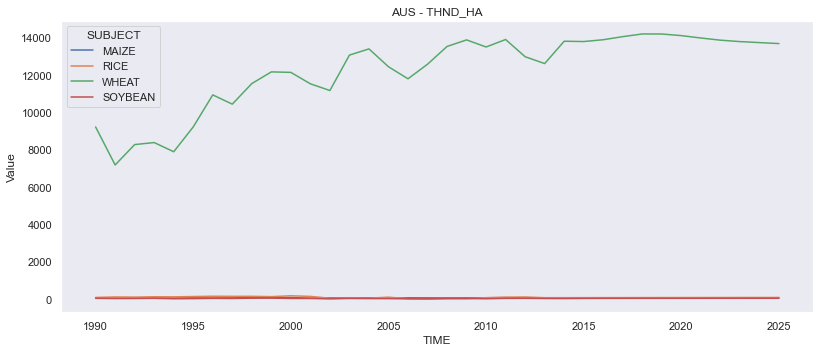

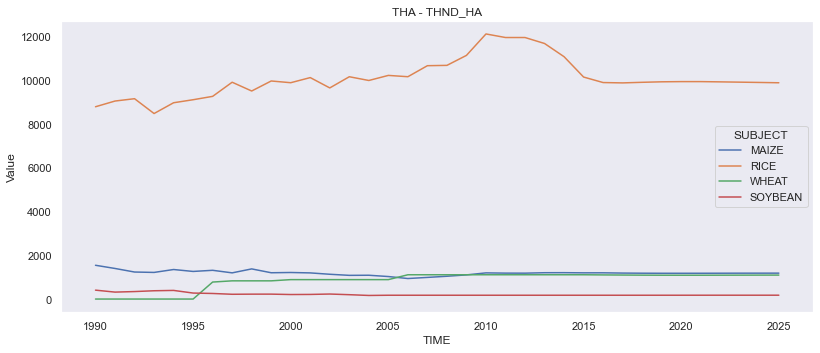

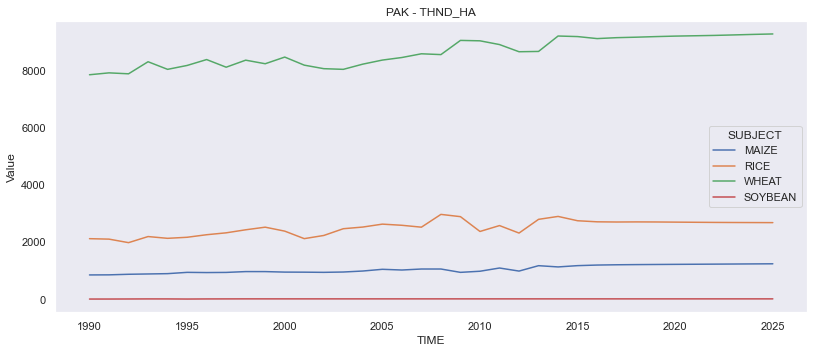

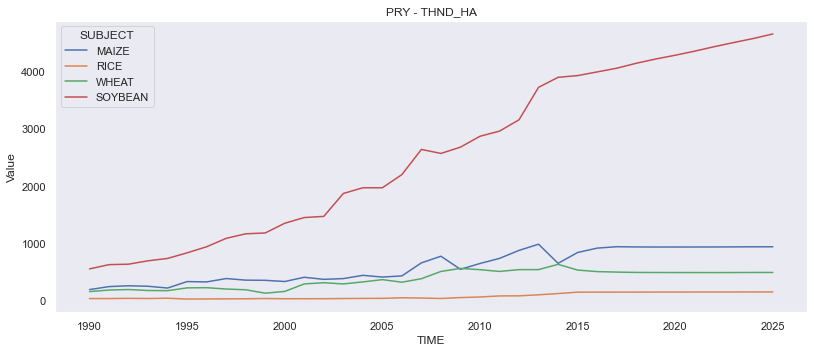

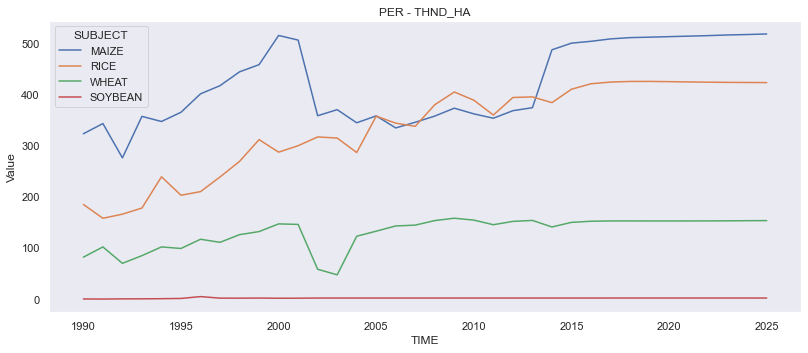

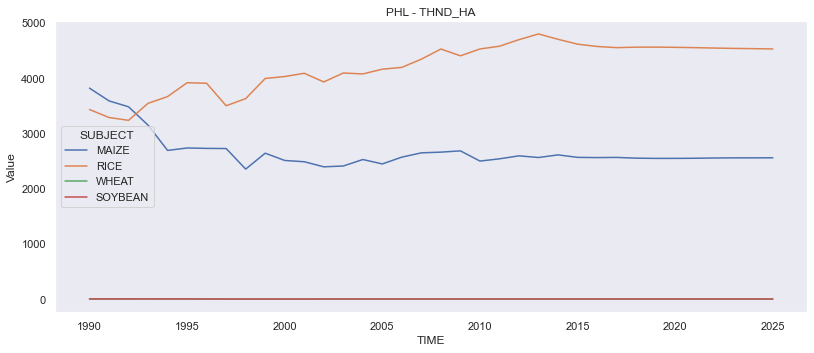

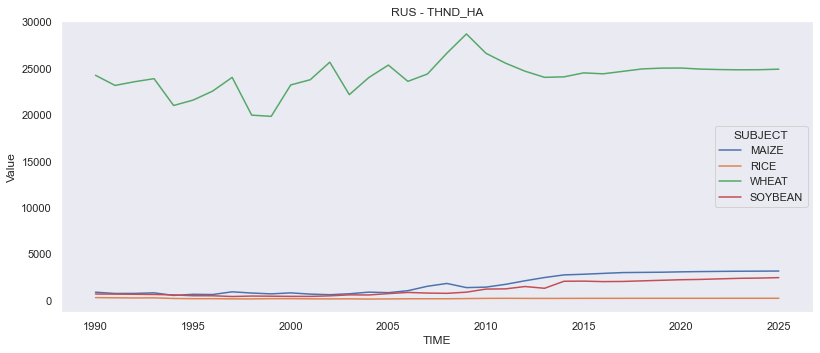

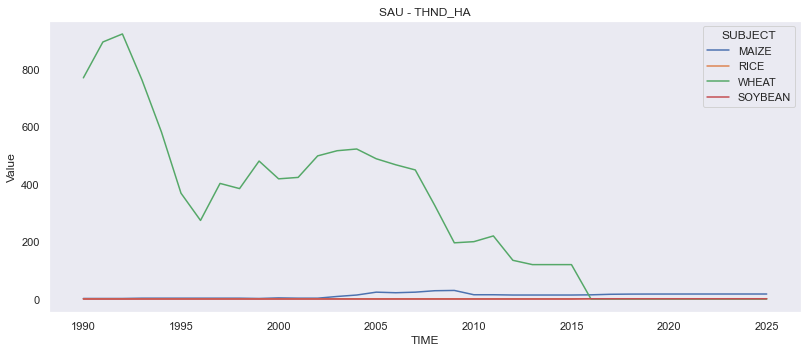

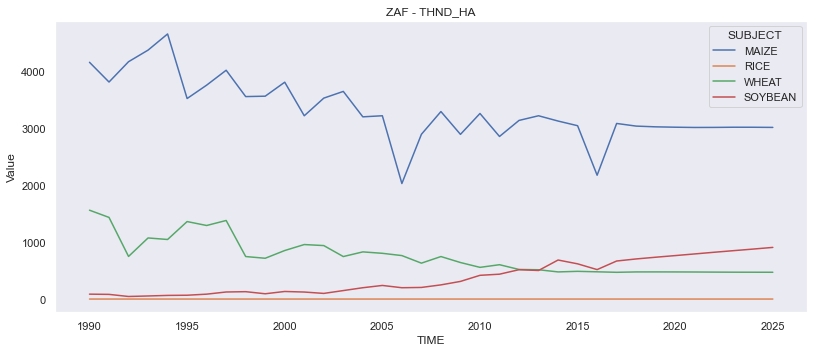

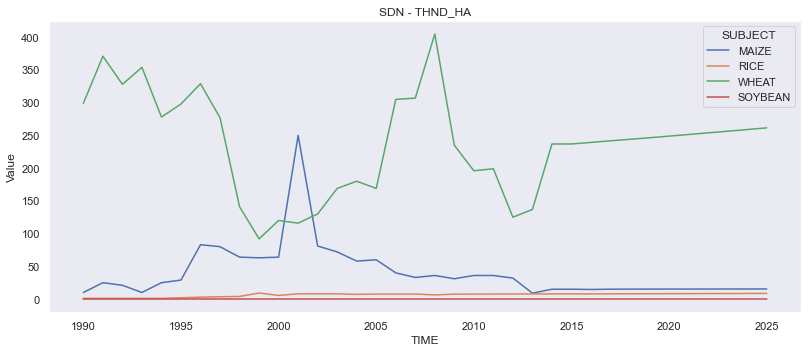

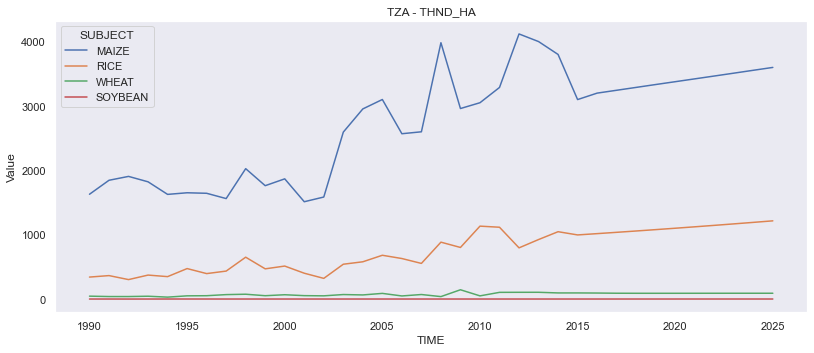

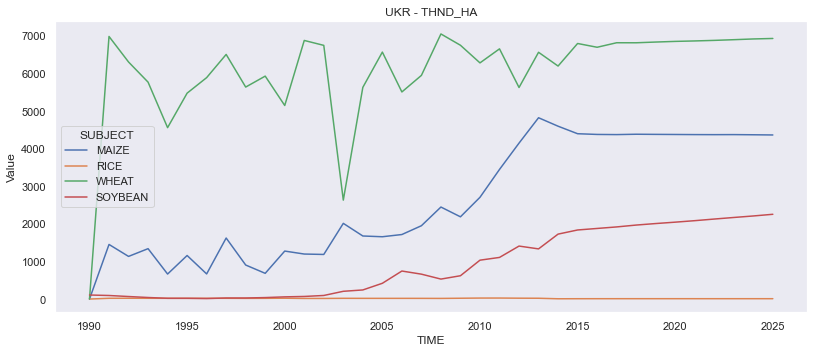

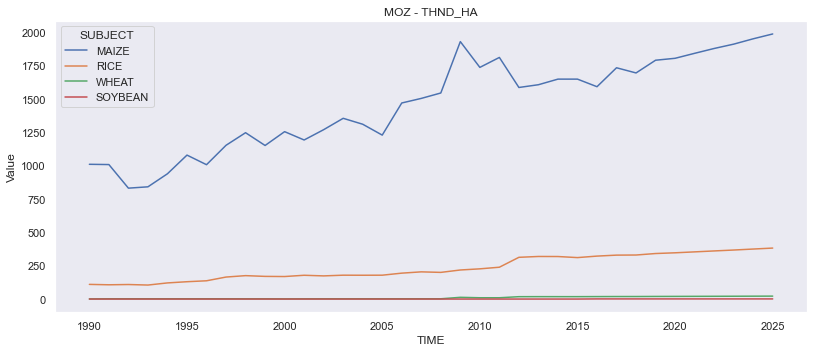

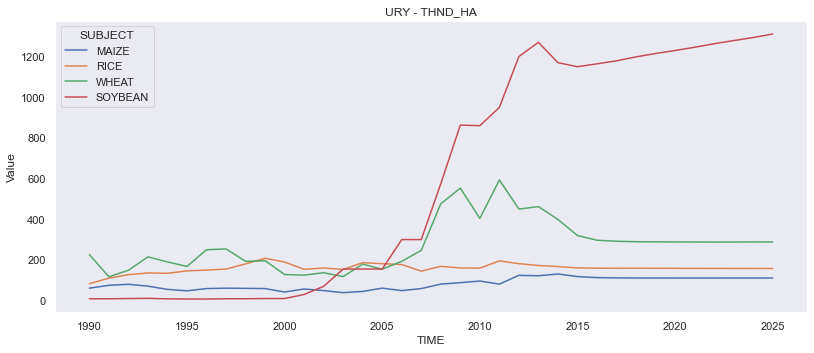

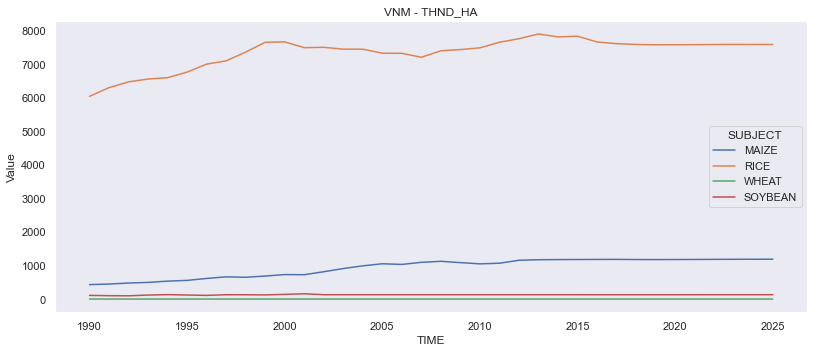

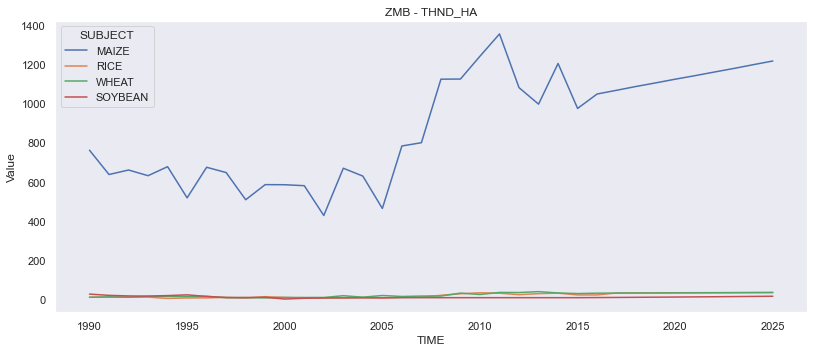

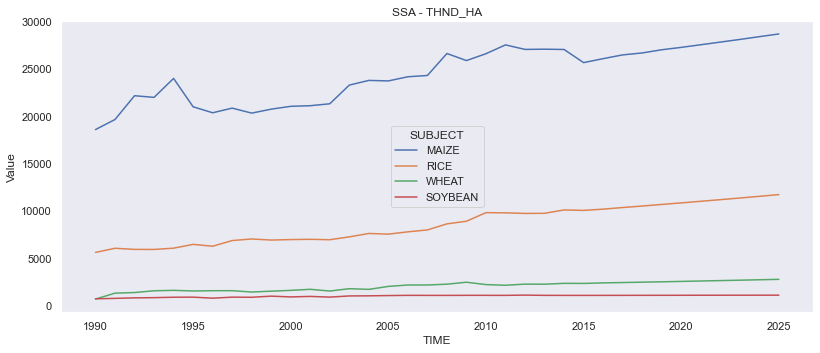

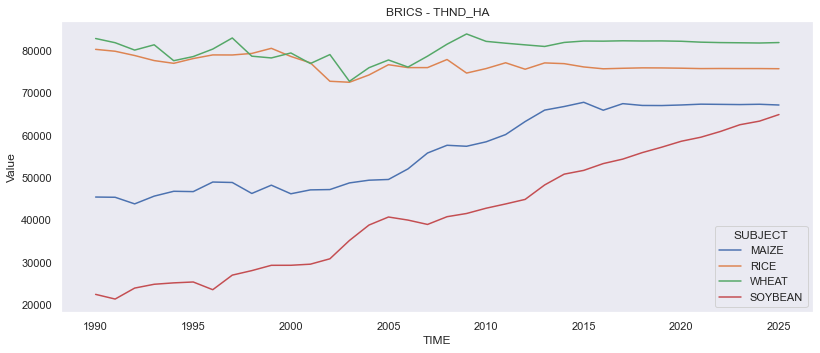

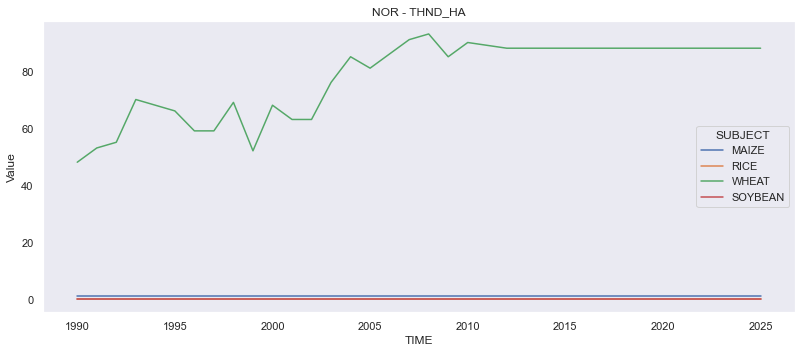

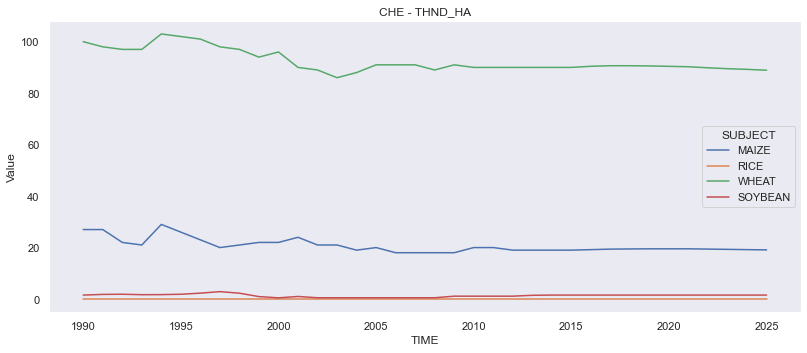

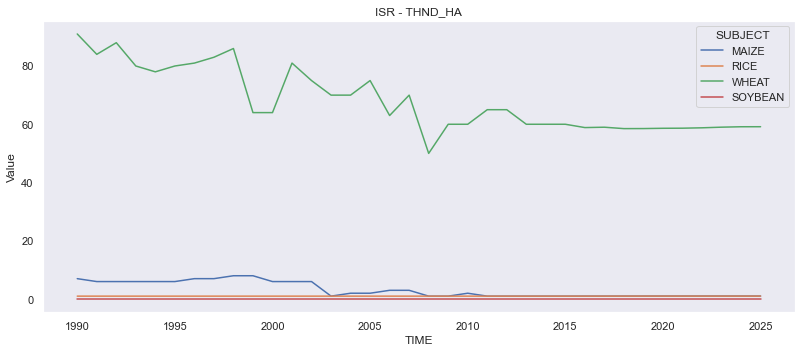

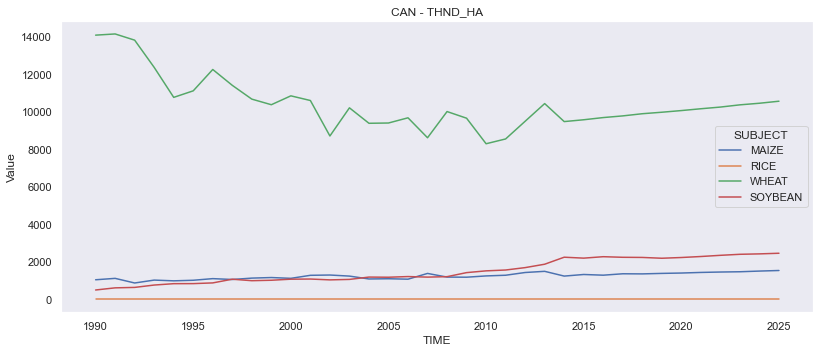

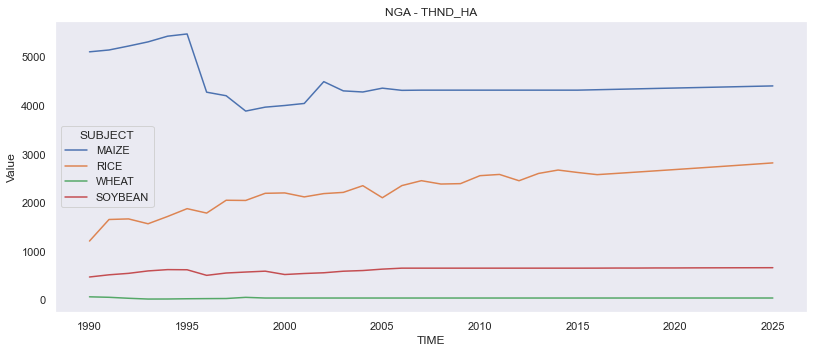

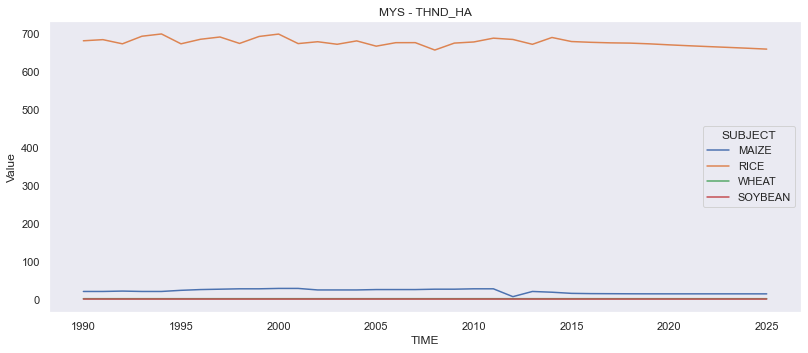

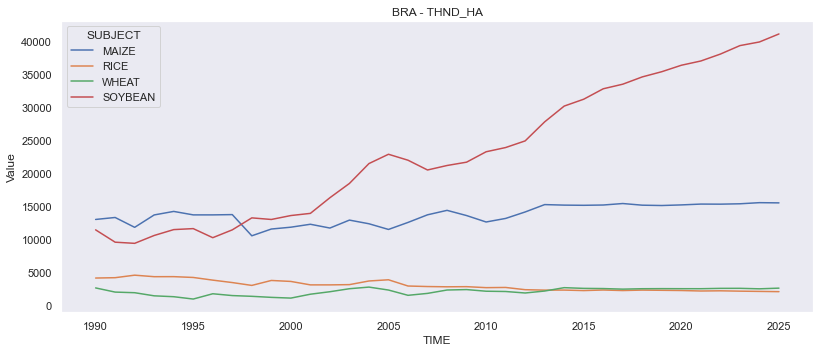

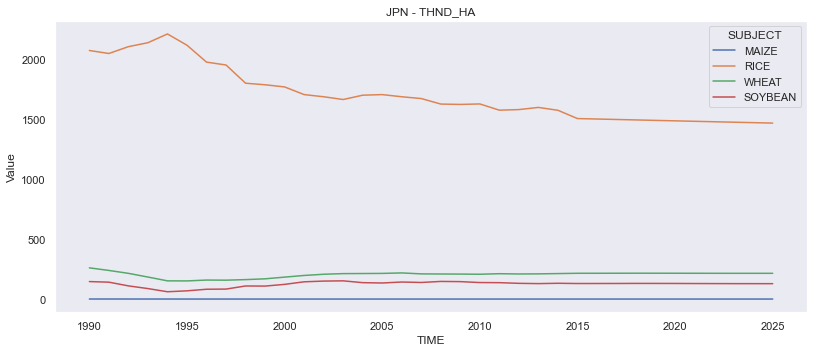

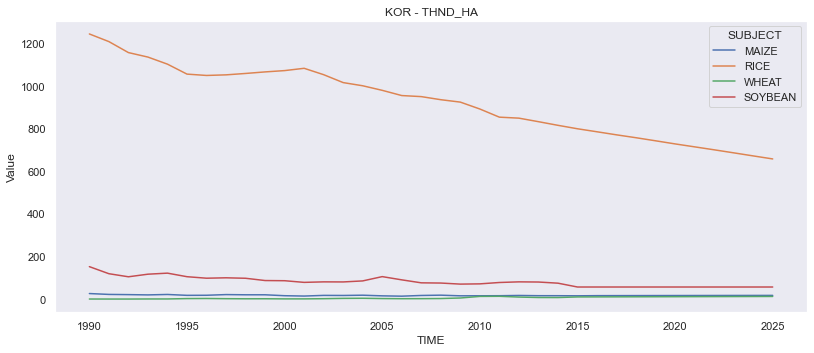

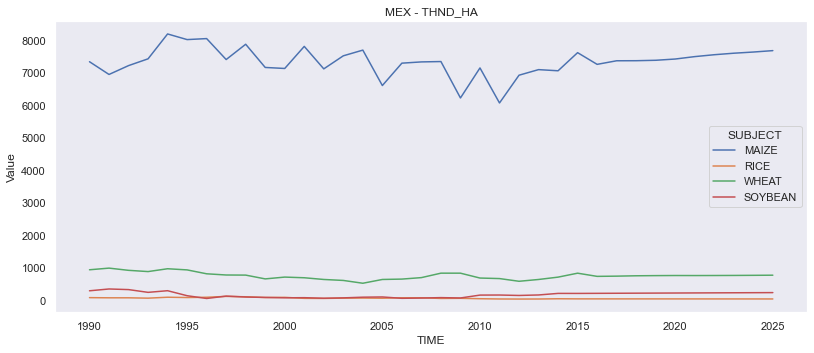

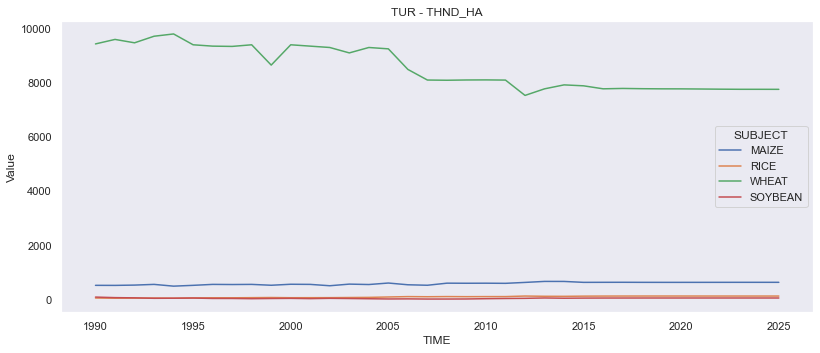

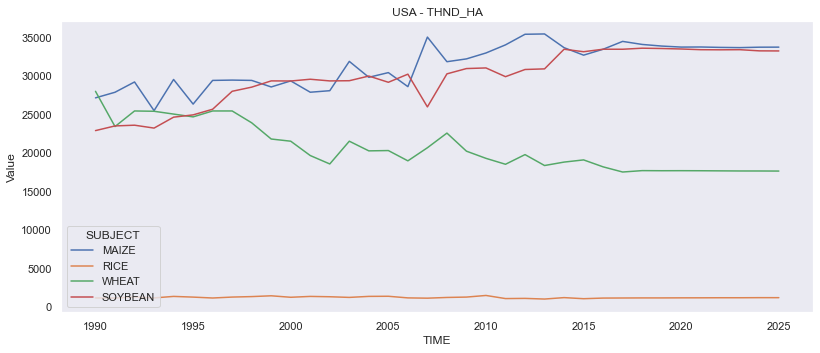

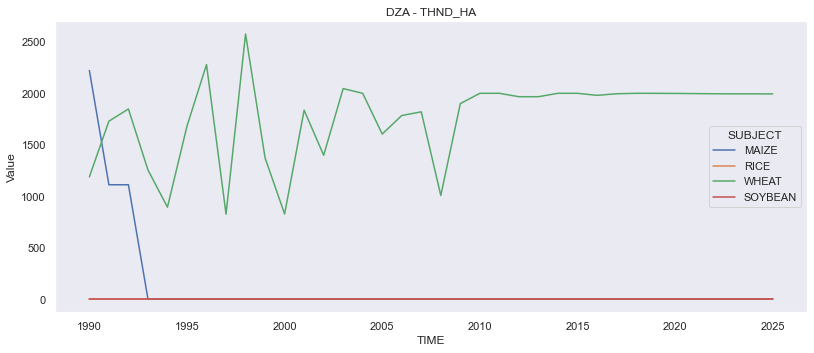

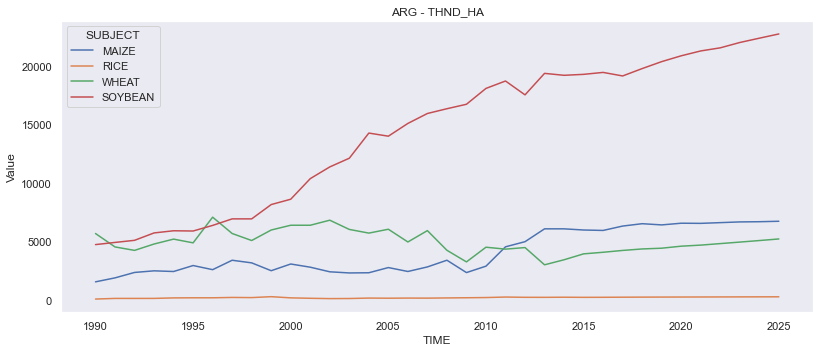

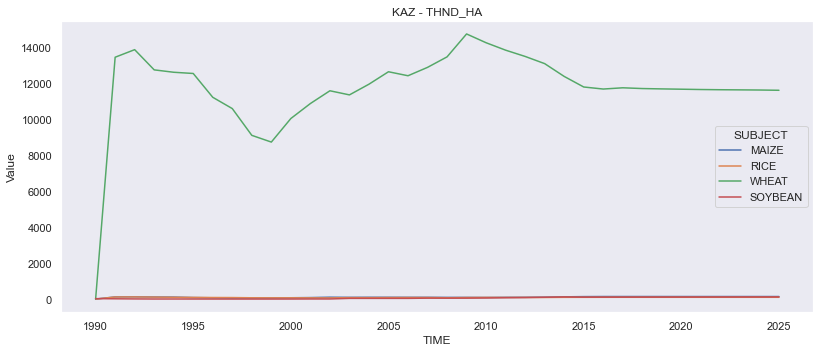

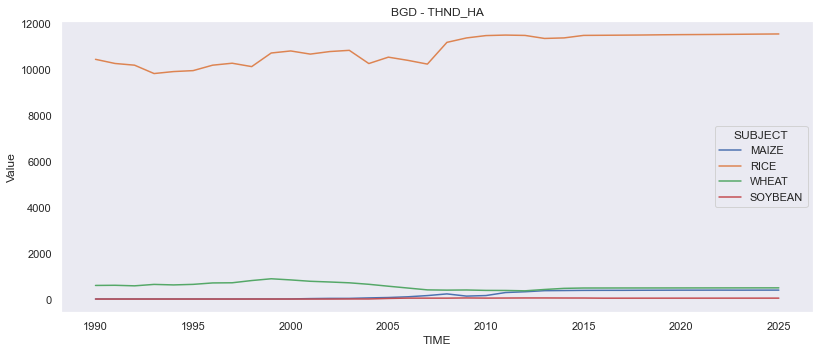

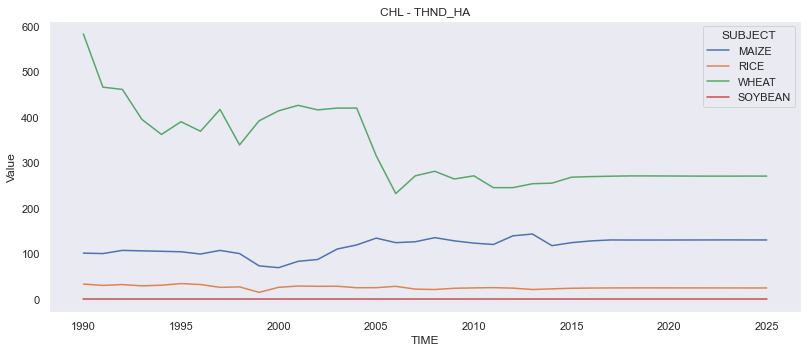

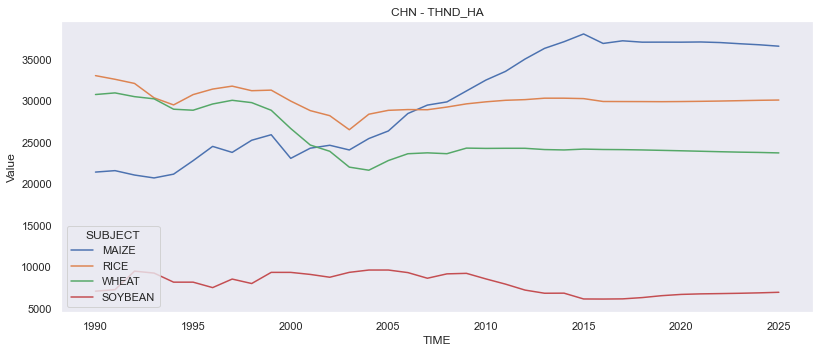

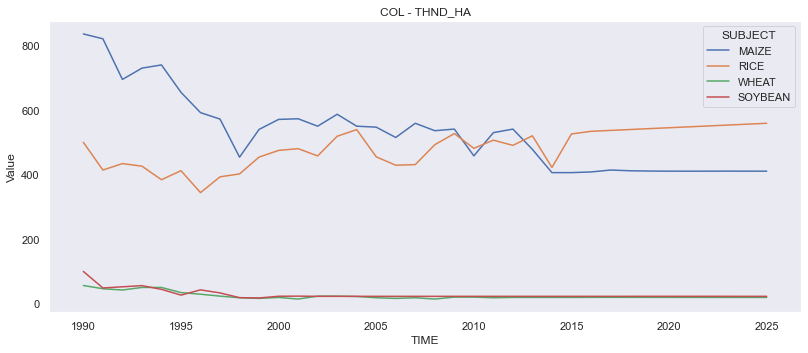

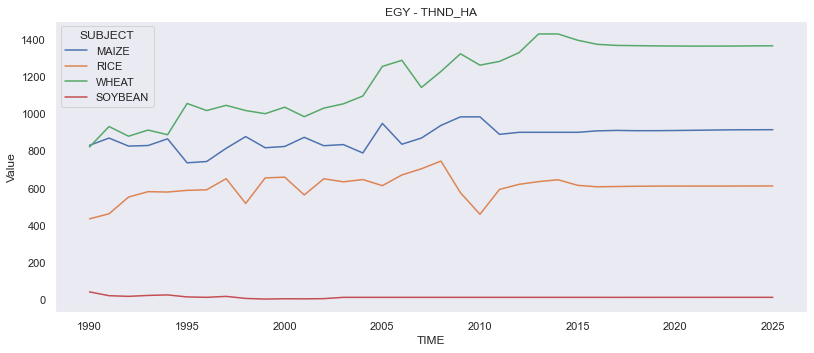

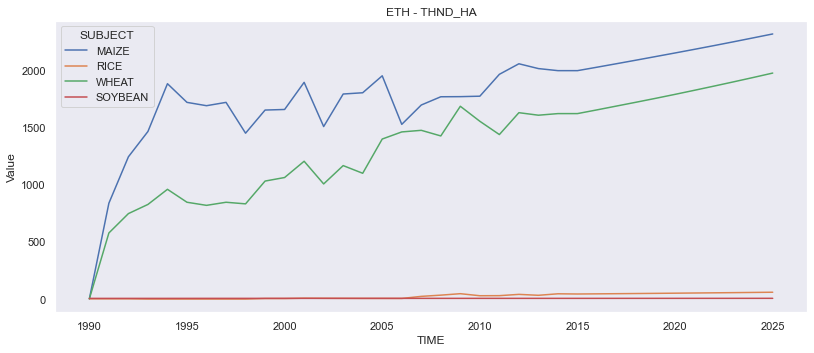

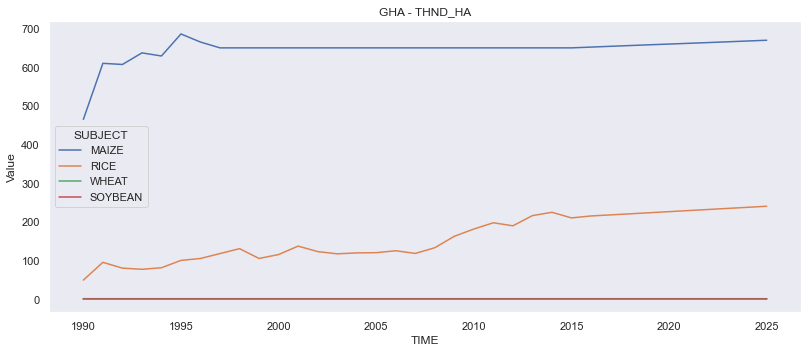

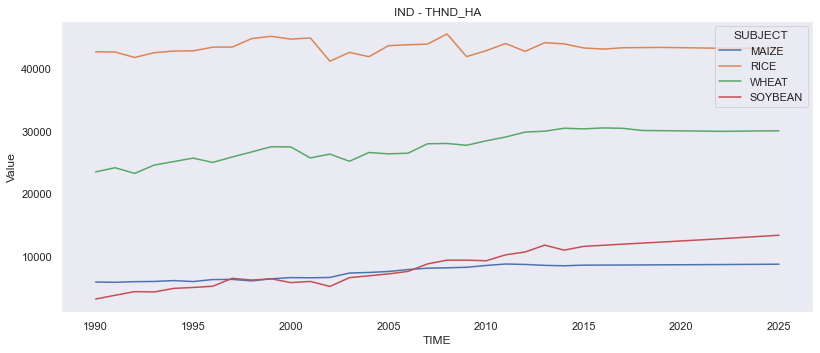

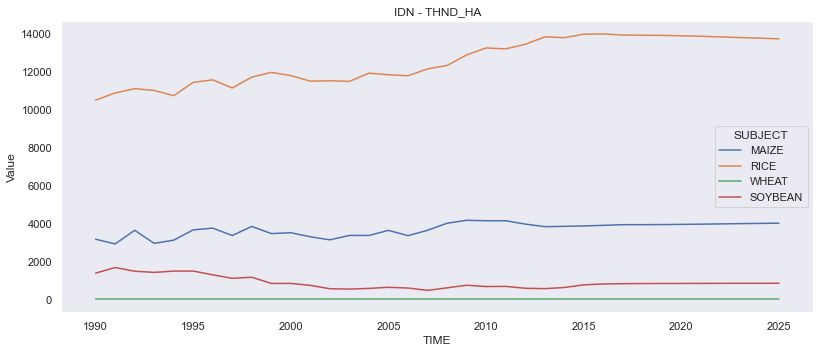

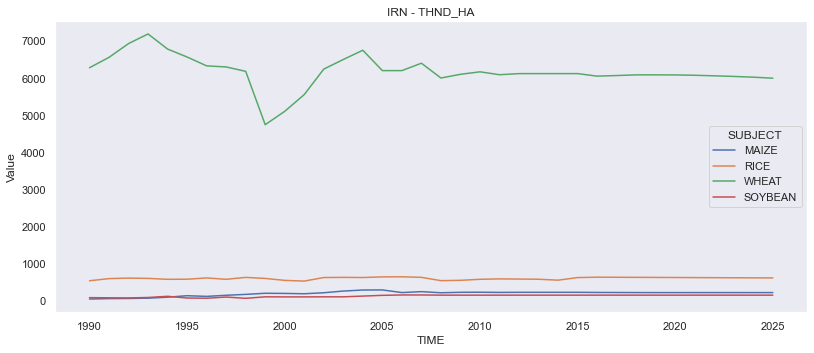

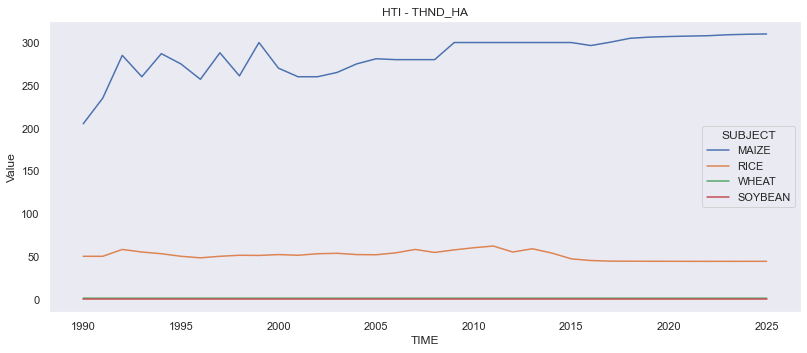

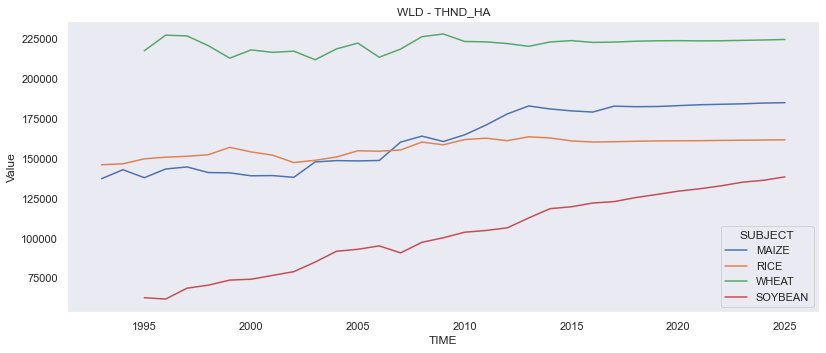

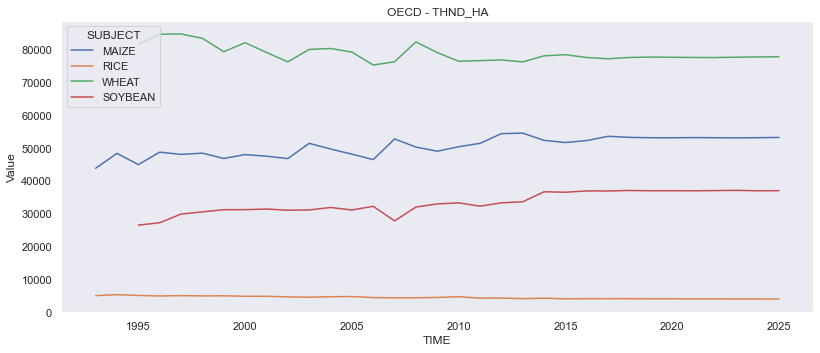

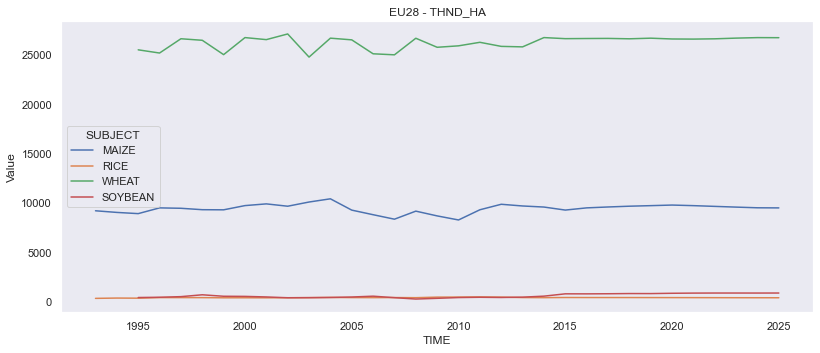

In [22]:
# loop over all locations
for select_location in all_locations:
    df_select = df[(df.LOCATION==select_location) & (df.MEASURE==select_measure)]
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df_select, x='TIME', y='Value', 
                 hue='SUBJECT', hue_order=all_subjects)
    plt.title(select_location + ' - '+ select_measure)
    plt.grid()
    plt.show()

#### Measure = TONNE_HA

In [23]:
select_measure = 'TONNE_HA'

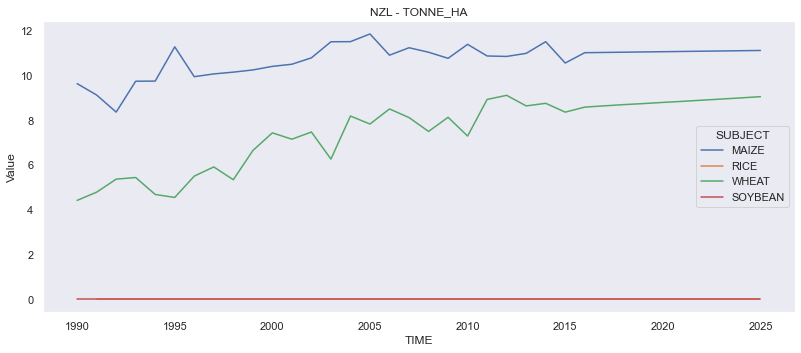

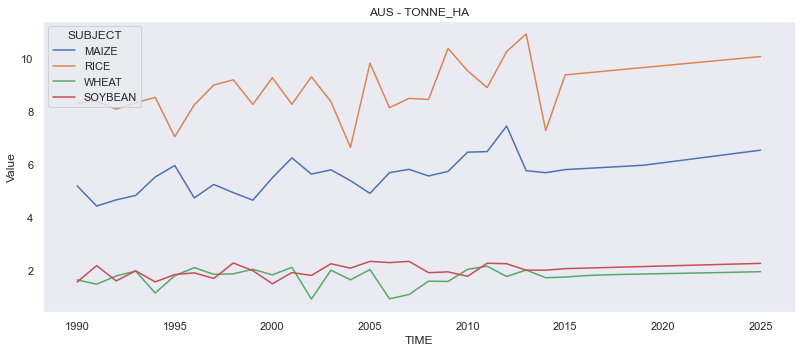

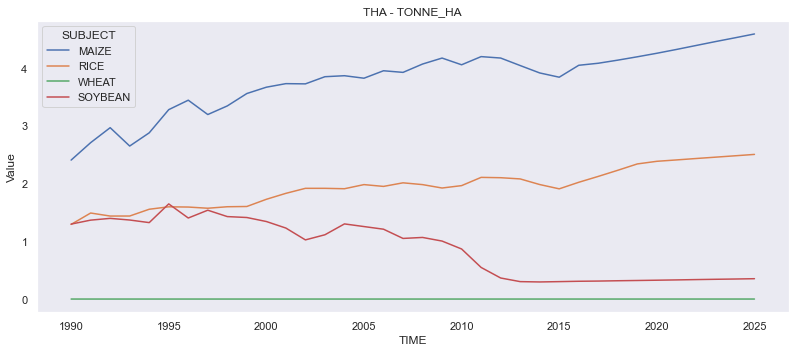

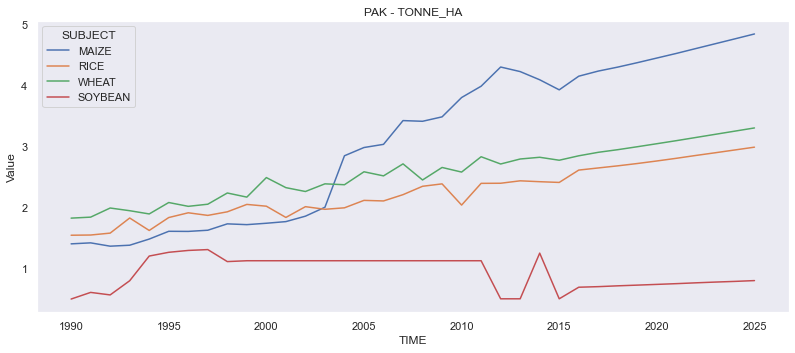

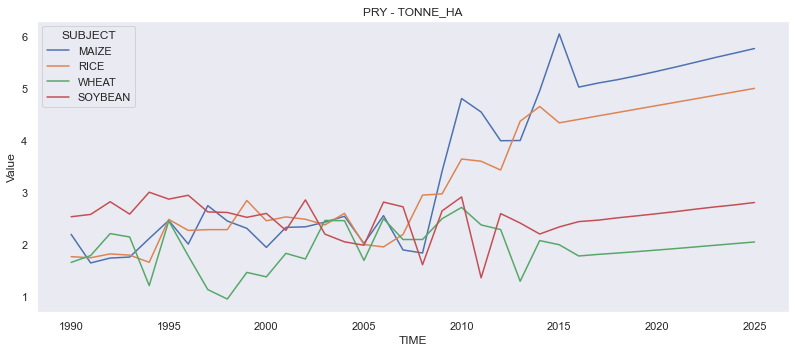

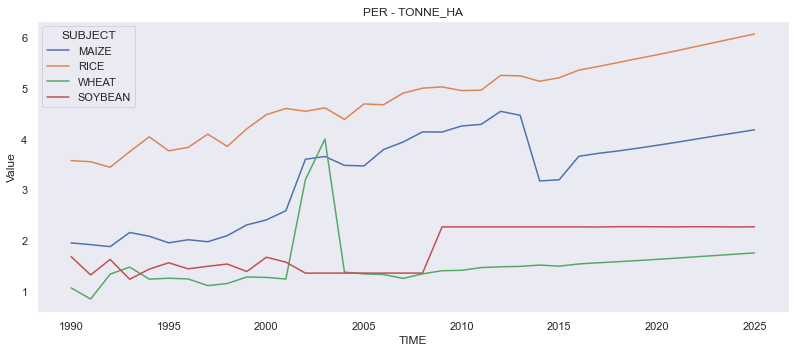

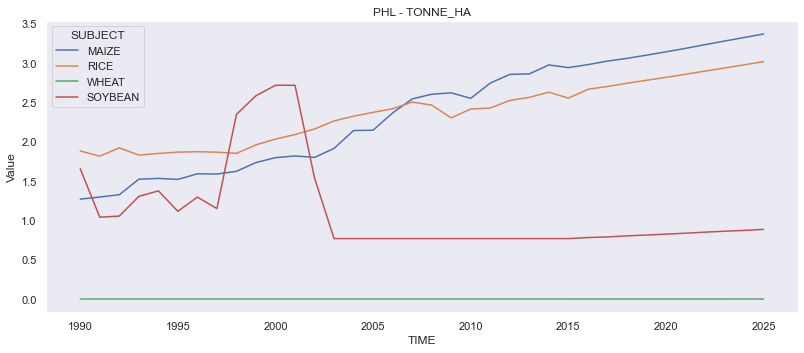

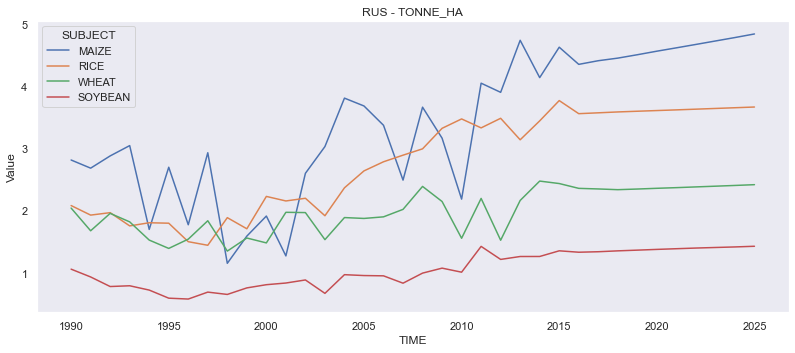

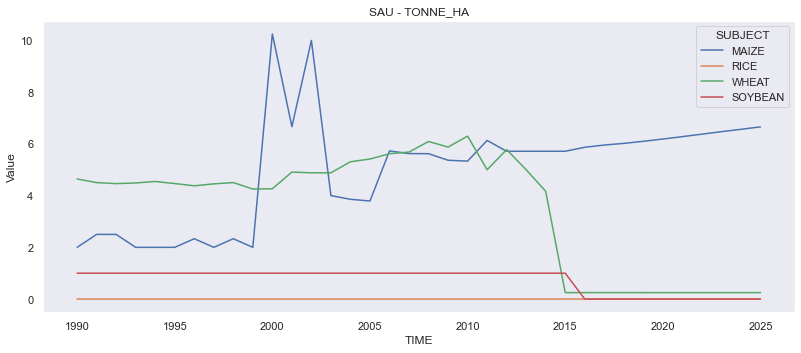

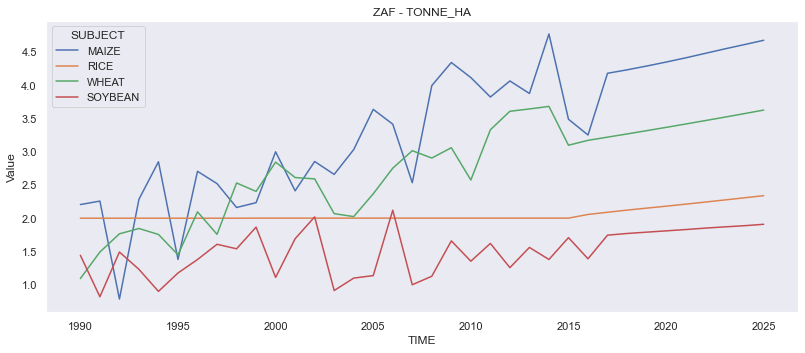

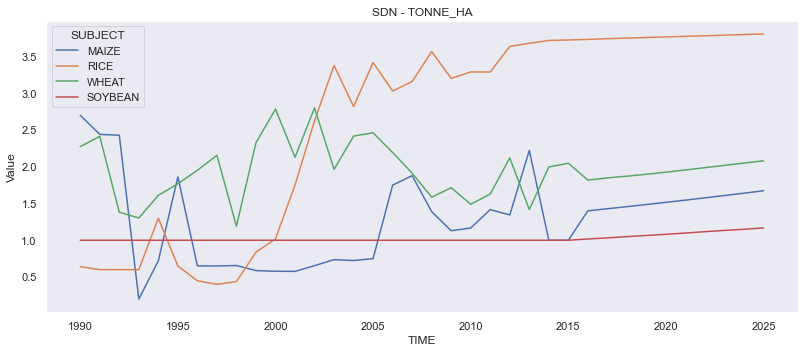

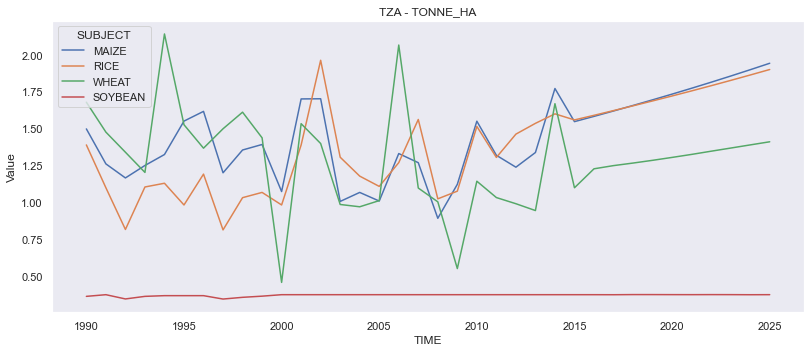

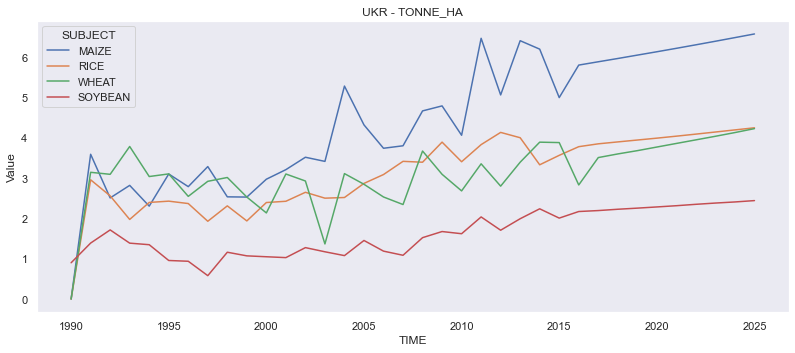

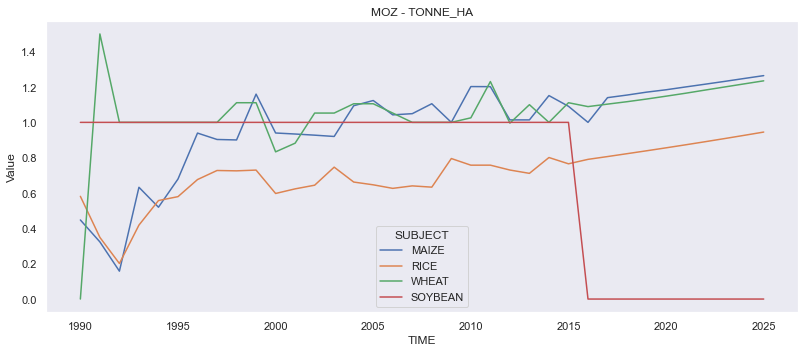

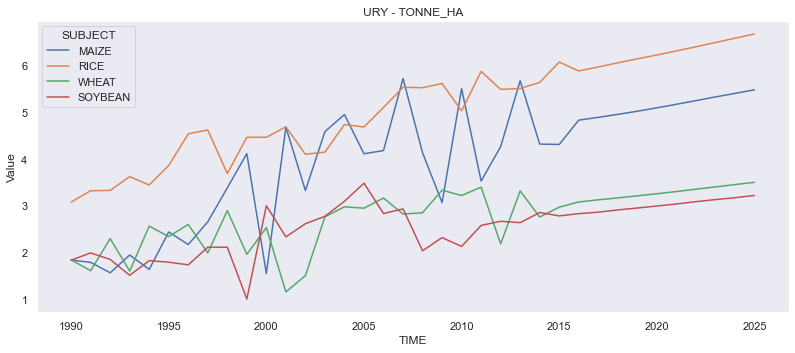

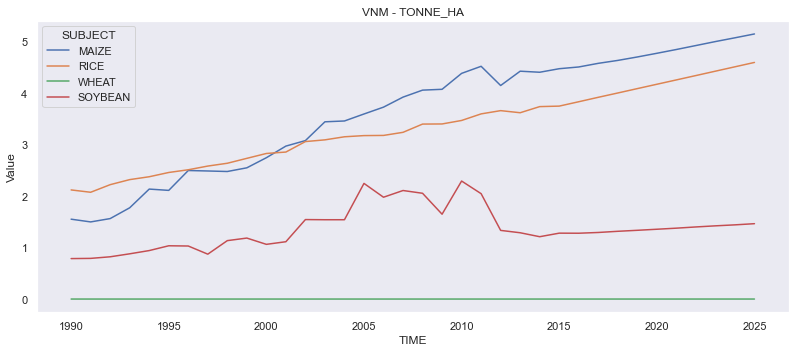

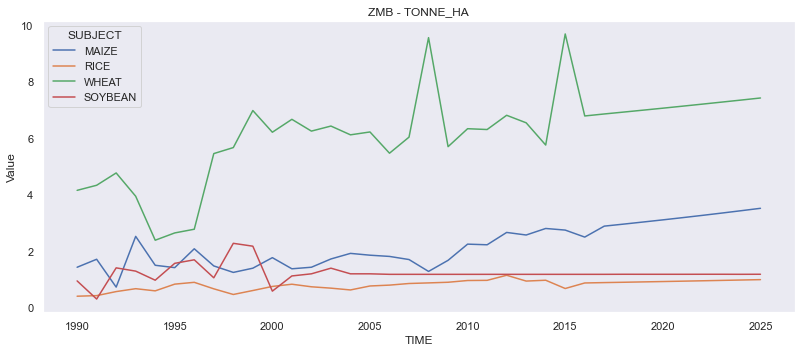

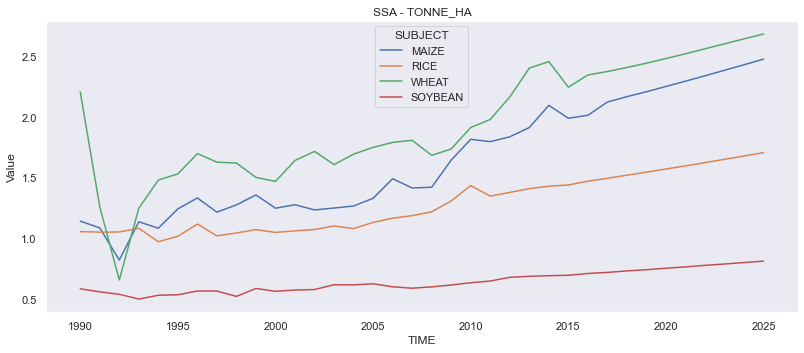

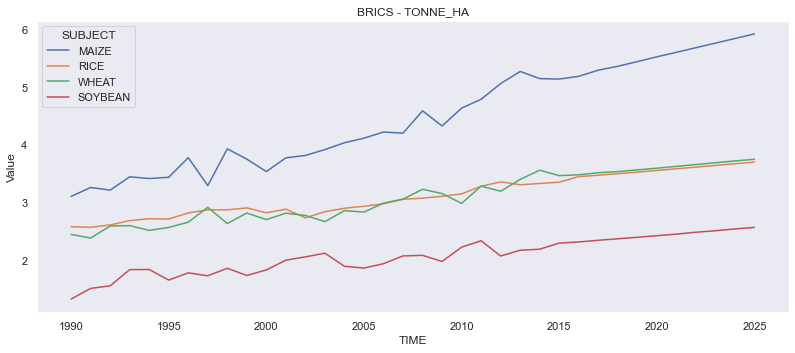

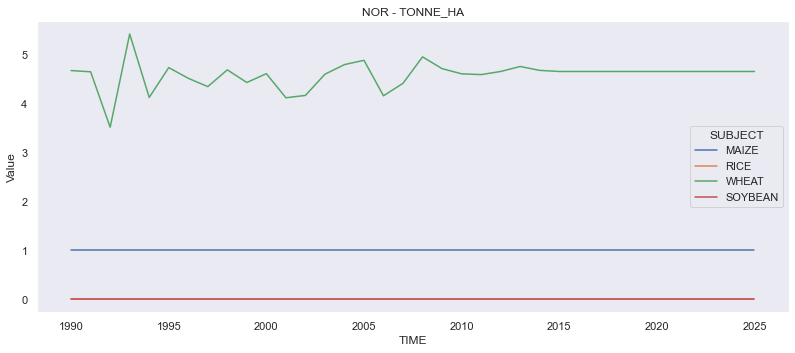

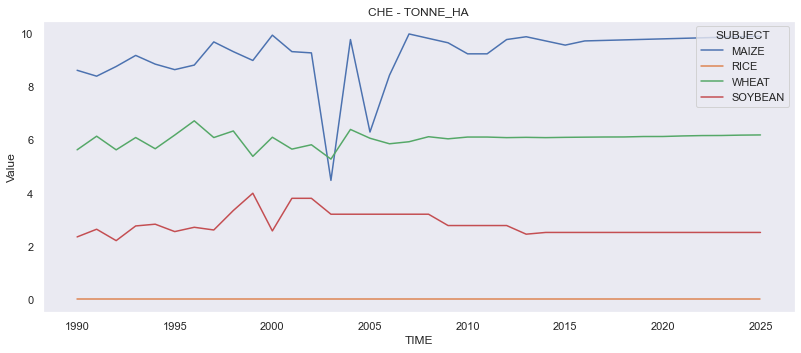

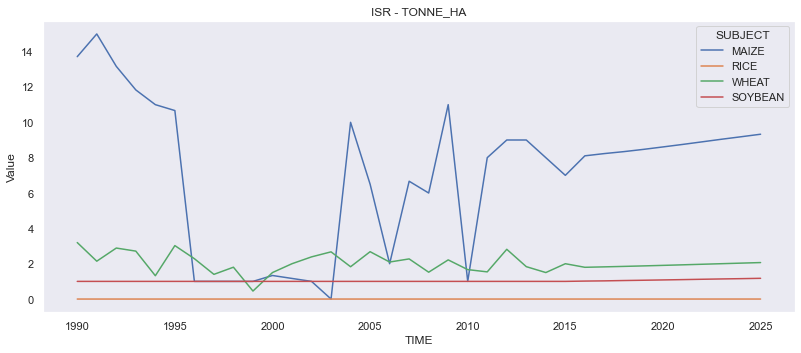

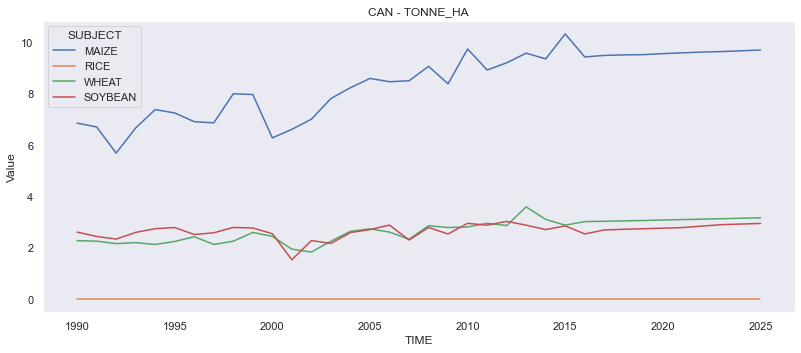

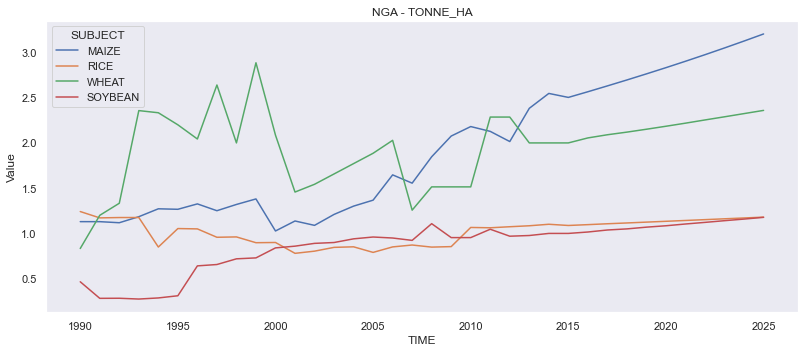

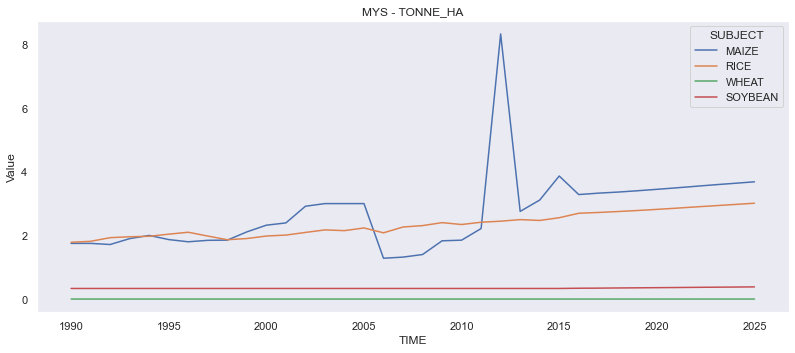

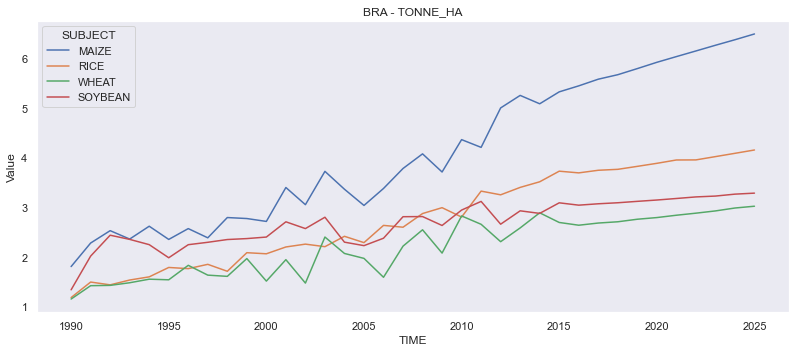

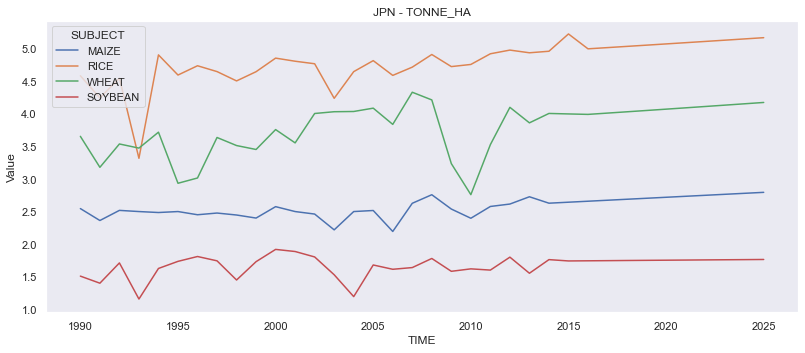

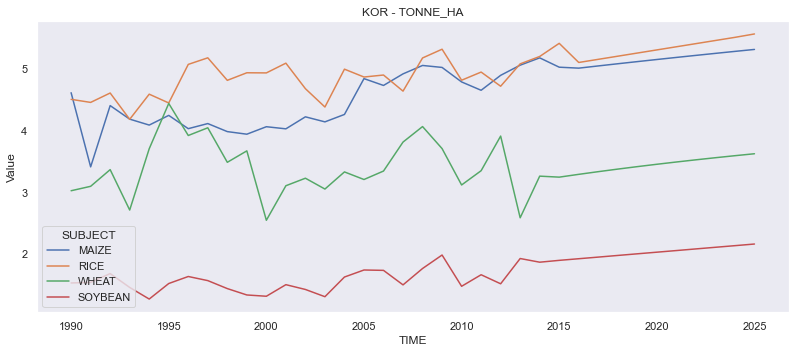

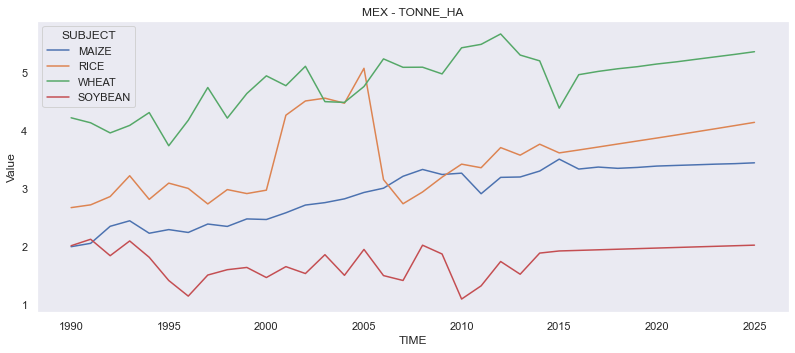

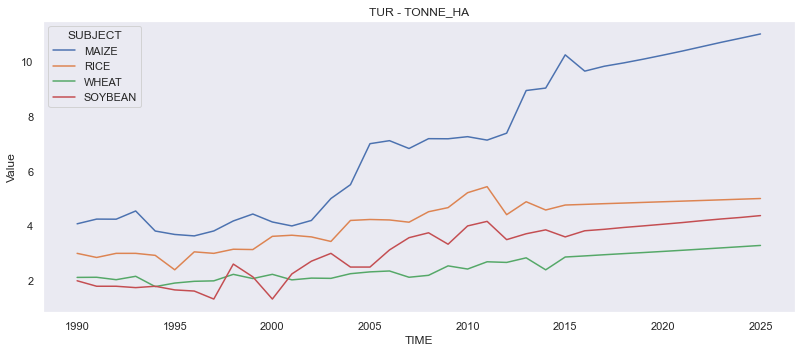

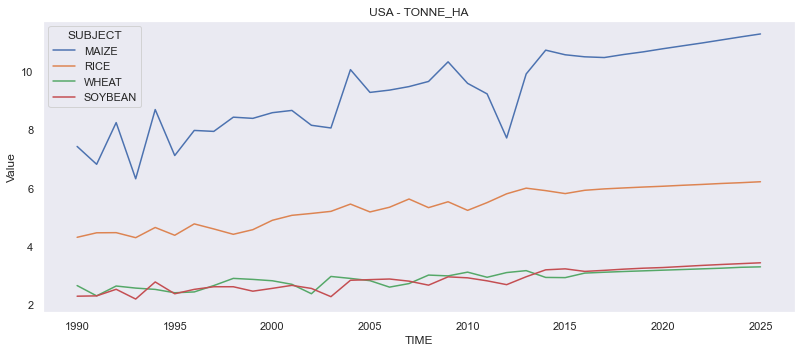

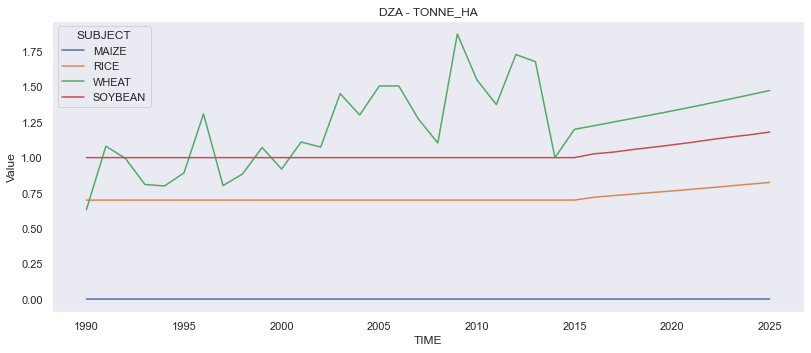

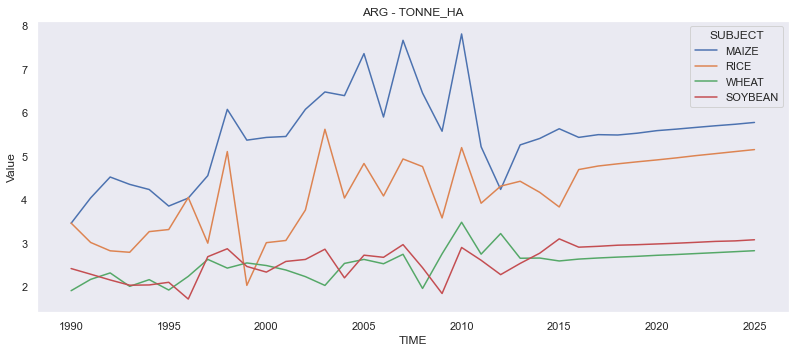

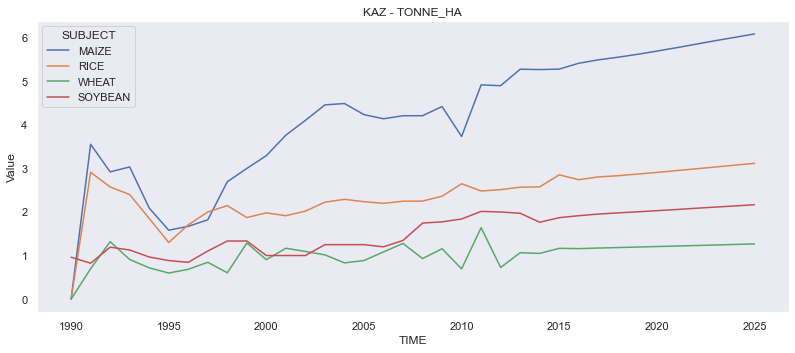

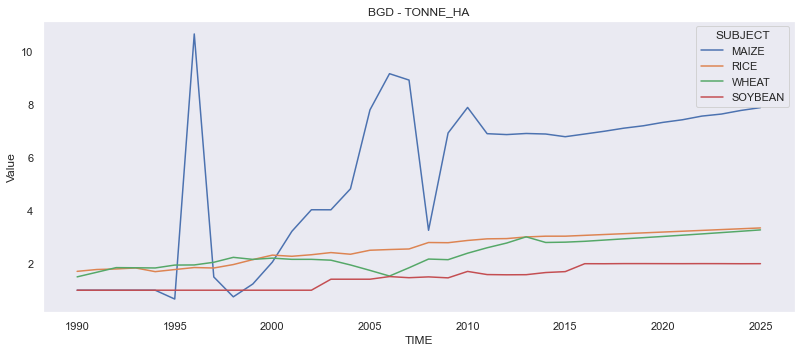

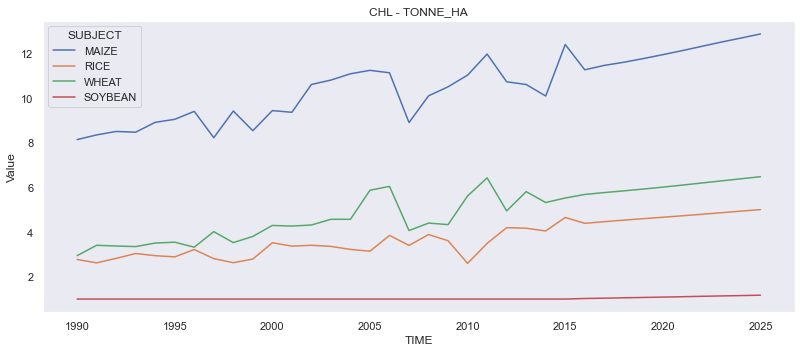

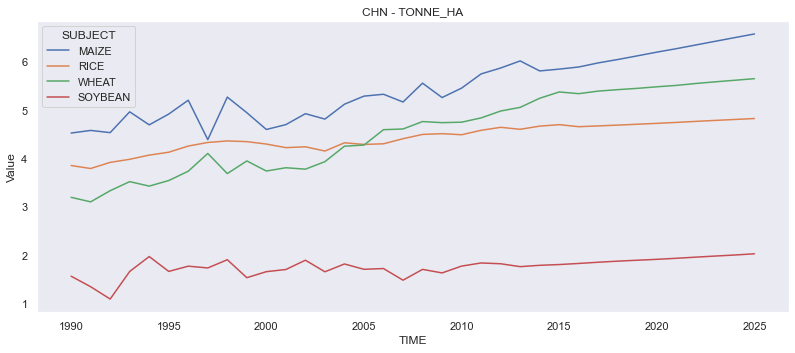

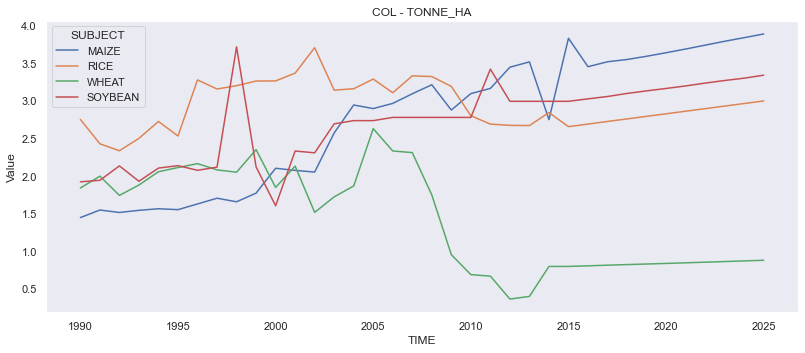

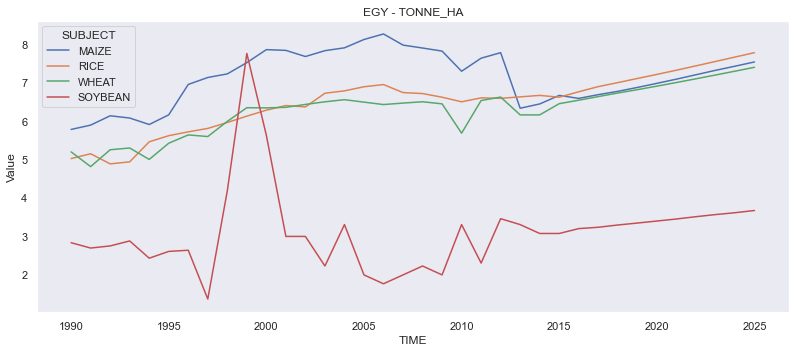

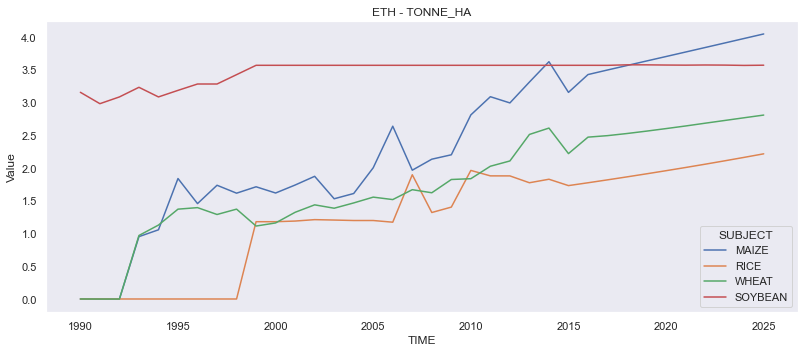

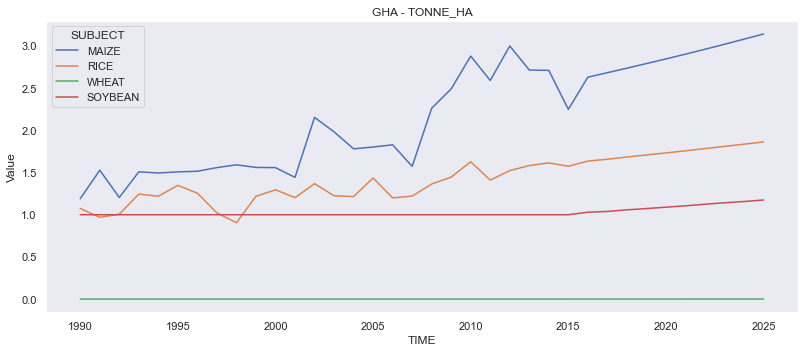

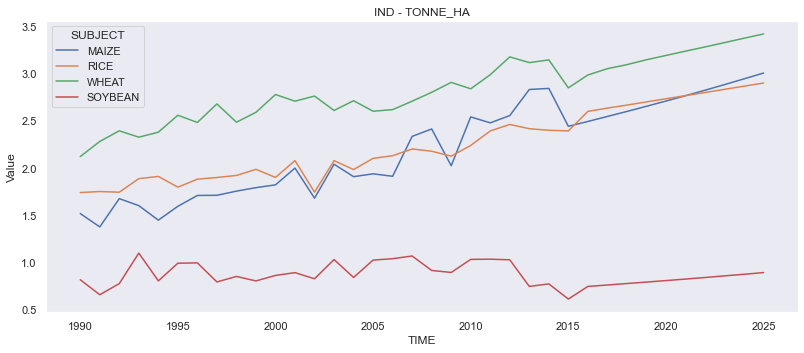

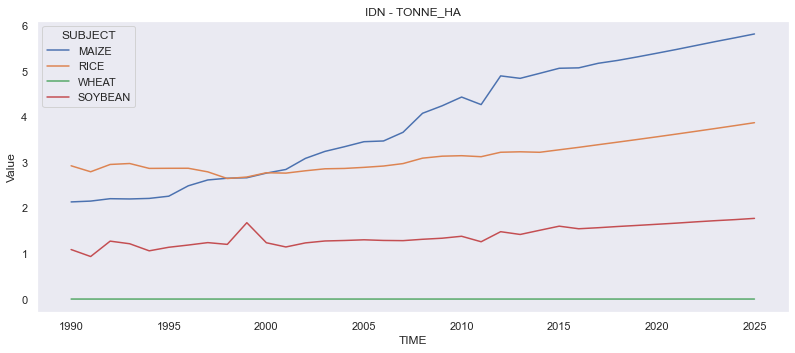

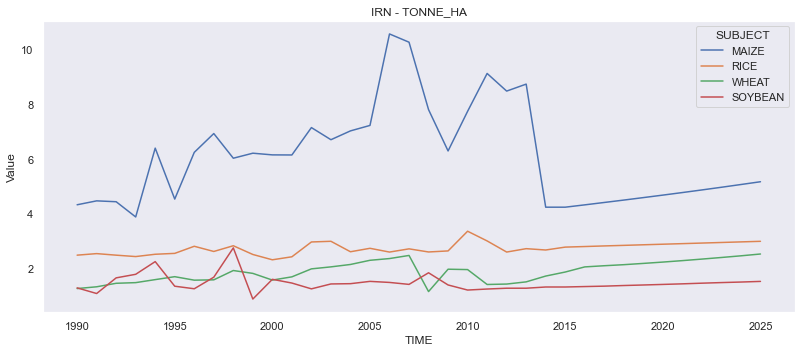

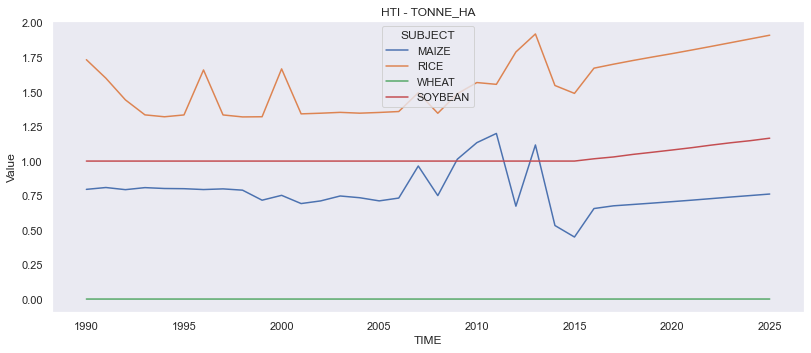

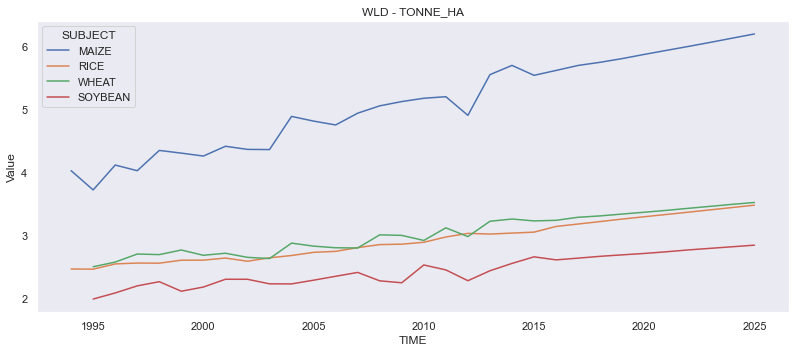

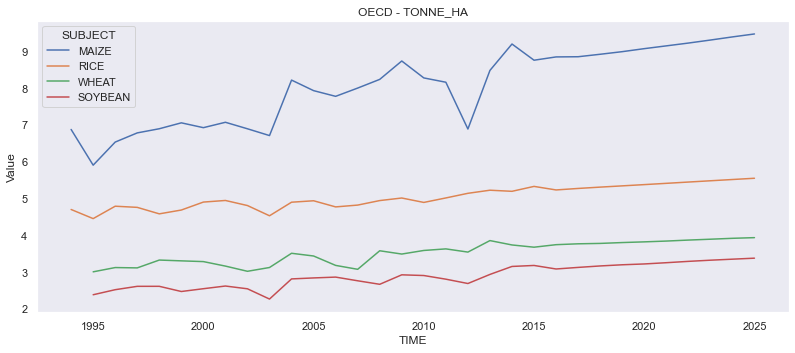

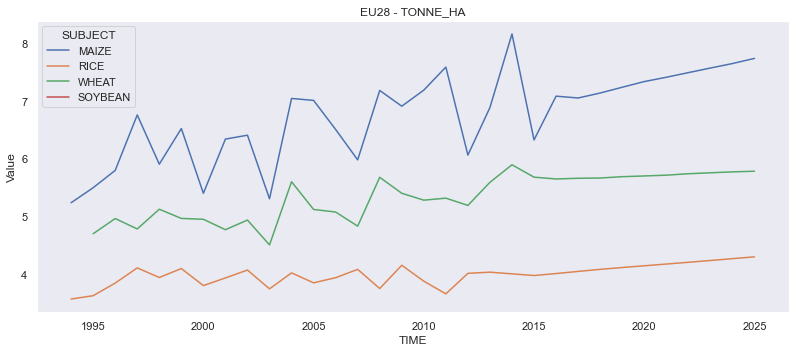

In [24]:
# loop over all locations
for select_location in all_locations:
    df_select = df[(df.LOCATION==select_location) & (df.MEASURE==select_measure)]
    plt.figure(figsize=(12,5))
    sns.lineplot(data=df_select, x='TIME', y='Value', 
                 hue='SUBJECT', hue_order=all_subjects)
    plt.title(select_location + ' - '+ select_measure)
    plt.grid()
    plt.show()